In [ ]:
#IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#also importing warnings

import warnings

# Suppress all warnings (not recommended for production code)
warnings.filterwarnings("ignore")

In [ ]:
#Reading the datasets for understanding and analysis

application_data = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')


In [ ]:
#Reading the attributes dataset to understand the present columns of the original dataset
attributes_des = pd.read_csv('Attribute_DataSet.csv',encoding='unicode_escape')
attributes_des

In [ ]:
#Reading the application dataset
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Reading the tail of the dataset as well
application_data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [ ]:
#deriving the shape of the dataset
application_data.shape

(307511, 122)

In [ ]:
#Reading all those 122 columns!!
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
#Getting info of those columns in a breif
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
#Now, having some statistical info on those numerical columns using describe()
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
#checking for null values
application_data.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [ ]:
#Retreiving the columns that have more than 40% of their columns as null.

percentage_of_nulls = application_data.isnull().sum()*100/len(application_data)
most_data_missing_cols = percentage_of_nulls[percentage_of_nulls>=40]
most_data_missing_cols


,0
OWN_CAR_AGE,65.990810
EXT_SOURCE_1,56.381073
APARTMENTS_AVG,50.749729
BASEMENTAREA_AVG,58.515956
YEARS_BEGINEXPLUATATION_AVG,48.781019
YEARS_BUILD_AVG,66.497784
COMMONAREA_AVG,69.872297
ELEVATORS_AVG,53.295980
ENTRANCES_AVG,50.348768
FLOORSMAX_AVG,49.760822


In [ ]:
len(most_data_missing_cols)

49

In [ ]:
#Dropping those mostly null filled columns and checking shape of somewhat clean application data

application_data = application_data.drop(columns = most_data_missing_cols.index)
application_data.shape

(307511, 73)

In [ ]:
#Having the idea of columns that have percentage of null values less than 20%

least_data_missing_cols = percentage_of_nulls[percentage_of_nulls <= 20].sort_values()
least_data_missing_cols

,0
SK_ID_CURR,0.000000
REG_REGION_NOT_LIVE_REGION,0.000000
REG_REGION_NOT_WORK_REGION,0.000000
LIVE_REGION_NOT_WORK_REGION,0.000000
REG_CITY_NOT_WORK_CITY,0.000000
...,...
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631


Here, we can see that there are columns with 13-19.8% of null values in them, so we shall analyse them first

In [ ]:
least_data_missing_cols[-7:]

,0
AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
EXT_SOURCE_3,19.825307


In [ ]:
application_data[least_data_missing_cols[-7:].index]

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3
0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376
1,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.729567
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,0.0,1.0,0.0,0.0,1.0,1.0,0.218859
307509,0.0,0.0,0.0,0.0,0.0,0.0,0.661024


In [ ]:
#How about getting info on them?

application_data[least_data_missing_cols[-7:].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 6   EXT_SOURCE_3                246546 non-null  float64
dtypes: float64(7)
memory usage: 16.4 MB


In [ ]:
#Checking for number of unique values in those columns

# no of unique values of each column

print("No. of unique values in AMT_REQ_CREDIT_BUREAU_QRT:",application_data['AMT_REQ_CREDIT_BUREAU_QRT'].nunique())

print("No. of unique values in AMT_REQ_CREDIT_BUREAU_YEAR:",application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].nunique())

print("No. of unique values in AMT_REQ_CREDIT_BUREAU_MON:",application_data['AMT_REQ_CREDIT_BUREAU_MON'].nunique())

print("No. of unique values in AMT_REQ_CREDIT_BUREAU_WEEK:",application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].nunique())

print("No. of unique values in AMT_REQ_CREDIT_BUREAU_DAY:",application_data['AMT_REQ_CREDIT_BUREAU_DAY'].nunique())

print("No. of unique values in AMT_REQ_CREDIT_BUREAU_HOUR:",application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].nunique())

print("No. of unique values in EXT_SOURCE_3:",application_data['EXT_SOURCE_3'].nunique())

No. of unique values in AMT_REQ_CREDIT_BUREAU_QRT: 11
No. of unique values in AMT_REQ_CREDIT_BUREAU_YEAR: 25
No. of unique values in AMT_REQ_CREDIT_BUREAU_MON: 24
No. of unique values in AMT_REQ_CREDIT_BUREAU_WEEK: 9
No. of unique values in AMT_REQ_CREDIT_BUREAU_DAY: 9
No. of unique values in AMT_REQ_CREDIT_BUREAU_HOUR: 5
No. of unique values in EXT_SOURCE_3: 814


In [ ]:
#Value counts of those columns to get more idea of the respectively

application_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

,count
AMT_REQ_CREDIT_BUREAU_QRT,
0.0,215417
1.0,33862
2.0,14412
3.0,1717
4.0,476
5.0,64
6.0,28
8.0,7
7.0,7


In [ ]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

,count
AMT_REQ_CREDIT_BUREAU_YEAR,
0.0,71801
1.0,63405
2.0,50192
3.0,33628
4.0,20714
5.0,12052
6.0,6967
7.0,3869
8.0,2127


In [ ]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

,count
AMT_REQ_CREDIT_BUREAU_MON,
0.0,222233
1.0,33147
2.0,5386
3.0,1991
4.0,1076
5.0,602
6.0,343
7.0,298
9.0,206


In [ ]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

,count
AMT_REQ_CREDIT_BUREAU_WEEK,
0.0,257456
1.0,8208
2.0,199
3.0,58
4.0,34
6.0,20
5.0,10
8.0,5
7.0,2


In [ ]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

,count
AMT_REQ_CREDIT_BUREAU_DAY,
0.0,264503
1.0,1292
2.0,106
3.0,45
4.0,26
5.0,9
6.0,8
9.0,2
8.0,1


In [ ]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

,count
AMT_REQ_CREDIT_BUREAU_HOUR,
0.0,264366
1.0,1560
2.0,56
3.0,9
4.0,1


In [ ]:
application_data['EXT_SOURCE_3'].value_counts()


,count
EXT_SOURCE_3,
0.746300,1460
0.713631,1315
0.694093,1276
0.670652,1191
0.652897,1154
...,...
0.021492,1
0.019468,1
0.023062,1


In [ ]:
#Description of these columns

application_data[least_data_missing_cols[-7:].index].describe()

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,246546.000000
mean,0.265474,0.006402,0.007000,0.034362,0.267395,1.899974,0.510853
std,0.794056,0.083849,0.110757,0.204685,0.916002,1.869295,0.194844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000527
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370650
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.535276
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.669057
max,261.000000,4.000000,9.000000,8.000000,27.000000,25.000000,0.896010


ACC TO THE ATTRIBUTE DATASET, THESE COLUMNS HAVE VALUES THAT ARE MEANT TO BE HOURS,DAYS,MONTHS, AND YEARS. WHICH EXPLAINS THAT THESE ARE CATEGORICAL



In [ ]:
#THERE ARE MANY COLUMNS THAT I FIGURED OUT WHILE GOING THROUGH THE ATTRIBUTE DATASET TO BE UNNECESSARY

application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [ ]:
unnecessary_cols = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
          'FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
          'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
          'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
          'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
application_data.drop(columns= unnecessary_cols, inplace = True)

In [ ]:
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Now, getting info of the data

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [ ]:
#data's description

application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,1.422245,0.143421,1.405292,0.100049,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,2.400989,0.446698,2.379803,0.362291,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
#For this new dataset, let's check for unique values

application_data.nunique().sort_values(ascending=True)

,0
LIVE_CITY_NOT_WORK_CITY,2
REG_CITY_NOT_WORK_CITY,2
FLAG_MOBIL,2
FLAG_OWN_REALTY,2
REG_CITY_NOT_LIVE_CITY,2
NAME_CONTRACT_TYPE,2
TARGET,2
FLAG_OWN_CAR,2
CODE_GENDER,3
AMT_REQ_CREDIT_BUREAU_HOUR,5


In [ ]:
#by understanding the data, the columns are categorical upto 'ORGANIZATION_TYPE'
#so, I'm going to change their datatypes as category
categorical_cols=['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_MOBIL',
       'FLAG_OWN_REALTY', 'REG_CITY_NOT_LIVE_CITY', 'NAME_CONTRACT_TYPE',
       'TARGET', 'FLAG_OWN_CAR', 'CODE_GENDER', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'ORGANIZATION_TYPE']

#Now, I'm going to change their datatypes as category

for i in categorical_cols:
    application_data[i] = application_data[i].astype('category')




In [ ]:
#However, the ID's should not be a problem as it is unique for every applicant.
#To avoid issues, I change its data type into object and along with checking the info for these updates

application_data['SK_ID_CURR'] = application_data['SK_ID_CURR'].astype('object')
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [ ]:
#Describing the dataset now to check for any change from before

application_data.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,5.143927e-01,0.510853
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,1.910602e-01,0.194844
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,8.173617e-08,0.000527
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,3.924574e-01,0.370650
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,5.659614e-01,0.535276
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,6.636171e-01,0.669057
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,8.549997e-01,0.896010


#####You see now? there is an absence of SK_ID_CURR Column?

In [ ]:
#However, after looking upon the above description, I could see negative values for DAYS_BIRTH, DAYS_EMPLOED, DAYS_REGISTRATION, DAYA_ID_PUBLISH.
#Which is unnatural
#To change this, with the help of hints, I would like to apply absolute function to change them to positive and change the days to years

neg_columns = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
application_data[neg_columns]=application_data[neg_columns].abs()
application_data[neg_columns]=application_data[neg_columns]/365
application_data[neg_columns].describe()


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294
std,11.956133,382.037676,9.651743,4.135481
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


In [ ]:
#changing the column names

application_data.rename(columns={'DAYS_BIRTH':'Years_Birth','DAYS_EMPLOYED':'Years_Employed','DAYS_REGISTRATION':'Years_Registration','DAYS_ID_PUBLISH':'Years_Id_Publish'},inplace=True)
application_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [ ]:
#Analysing gender column:

application_data['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


In [ ]:
#replacing XNA with mode of code_gender column:

application_data.loc[application_data['CODE_GENDER']=='XNA','CODE_GENDER'] = 'F'
application_data['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202452
M,105059
XNA,0



Which means Females are applying more for loans than that of Males

In [ ]:
#checking 'AMT_INCOME_TOTAL' and 'AMT_CREDIT' variables:

application_data[['AMT_INCOME_TOTAL','AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,3.075110e+05,3.075110e+05
mean,1.687979e+05,5.990260e+05
std,2.371231e+05,4.024908e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.471500e+05,5.135310e+05
75%,2.025000e+05,8.086500e+05
max,1.170000e+08,4.050000e+06


In [ ]:
# its hard to determine the type of customer based on these high values

bins=[0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges=['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']
application_data['Amt_Income_Range'] = pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=ranges)
application_data['Amt_Credit_Range'] = pd.cut(application_data['AMT_CREDIT'],bins,labels=ranges)
application_data[['Amt_Income_Range','Amt_Credit_Range']].describe()

,Amt_Income_Range,Amt_Credit_Range
count,307511,307511
unique,19,18
top,100000-250000,250000-500000
freq,204035,90135


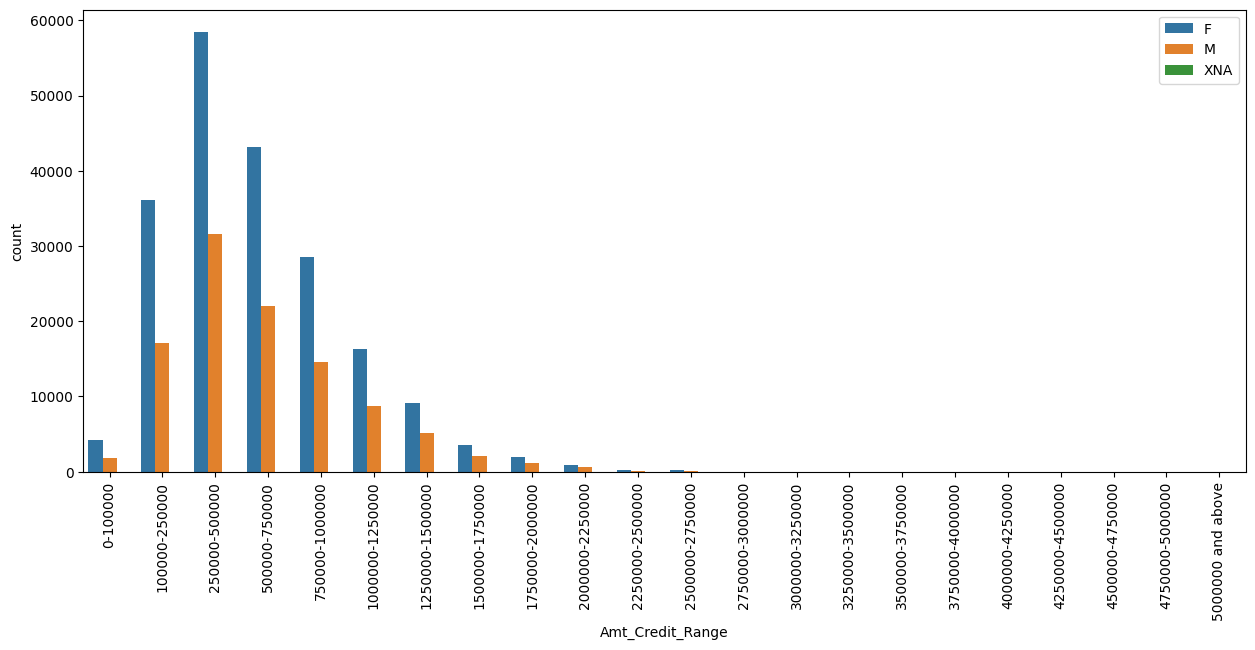

In [ ]:
#plotting counter plot on amount_credit

plt.figure(figsize=[15,6])
sns.countplot(data=application_data, x='Amt_Credit_Range',hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [ ]:
#checking for the outliers
application_data.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,Years_Birth,Years_Employed,Years_Registration,Years_Id_Publish,EXT_SOURCE_2,EXT_SOURCE_3
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,43.936973,185.547239,13.660604,8.203294,5.143927e-01,0.510853
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.956133,382.037676,9.651743,4.135481,1.910602e-01,0.194844
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,0.000000,0.000000,8.173617e-08,0.000527
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.008219,2.556164,5.506849,4.712329,3.924574e-01,0.370650
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.150685,6.079452,12.339726,8.915068,5.659614e-01,0.535276
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.923288,15.635616,20.491781,11.778082,6.636171e-01,0.669057
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120548,1000.665753,67.594521,19.717808,8.549997e-01,0.896010


In [ ]:
application_data['CNT_CHILDREN'].value_counts()

,count
CNT_CHILDREN,
0,215371
1,61119
2,26749
3,3717
4,429
5,84
6,21
7,7
14,3


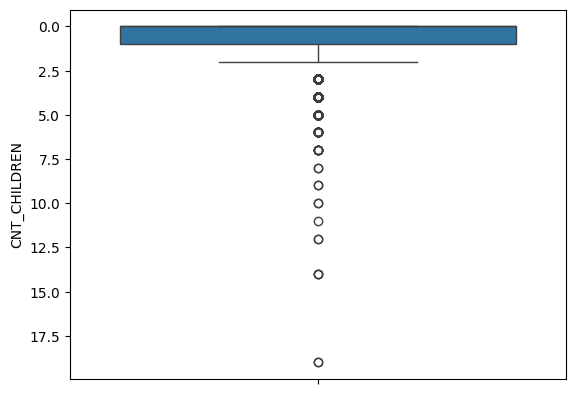

In [ ]:
#It is unnatural to have 19 babies so, plotting a box to check it even if it is clear from value_counts for better readability

sns.boxplot(application_data['CNT_CHILDREN'])
plt.show()


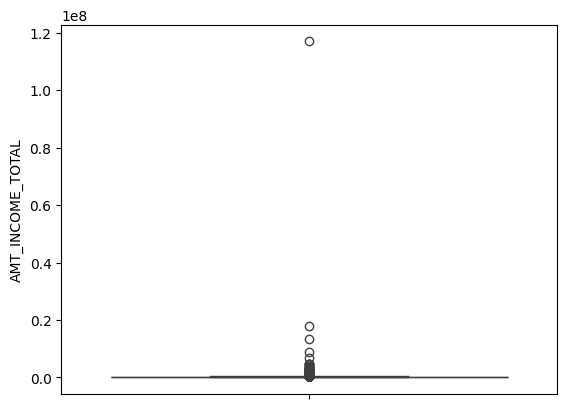

In [ ]:
#box plot on 'AMT_INCOME_TOTAL'

sns.boxplot(application_data['AMT_INCOME_TOTAL'])
plt.show()



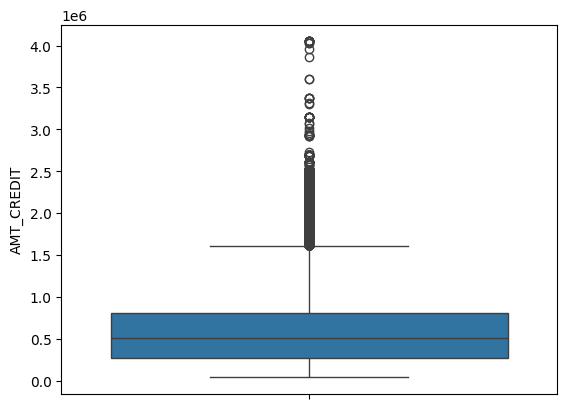

In [ ]:
#box plot for checking outliers in 'AMT_CREDIT'

sns.boxplot(application_data['AMT_CREDIT'])
plt.show()

In [ ]:
#checking for rows that have more AMT_CREDIT than AMT_INCOME_TOTAL:

application_data[application_data['AMT_CREDIT'] > application_data['AMT_INCOME_TOTAL']]



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0-100000,250000-500000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,100000-250000,500000-750000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,250000-500000


In [ ]:
#checking which are more than 3.5*1e6

application_data[application_data['AMT_CREDIT'] > 3.5*1e6]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range
14643,117085,0,Cash loans,F,Y,N,2,749331.0,3956274.0,197230.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,500000-750000,3750000-4000000
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000
53936,162494,0,Cash loans,M,Y,N,0,900450.0,3600000.0,91008.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,750000-1000000,3500000-3750000
95571,210956,0,Cash loans,M,N,Y,0,430650.0,4031032.5,102033.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,4000000-4250000
104577,221360,0,Cash loans,M,Y,N,0,468000.0,3600000.0,91138.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,3500000-3750000
110459,228135,0,Cash loans,M,N,N,2,864900.0,4050000.0,102384.0,...,3.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,750000-1000000,4000000-4250000
119380,238431,0,Cash loans,F,Y,N,0,292050.0,3860019.0,97578.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,250000-500000,3750000-4000000
119681,238782,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000
120757,240007,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000-750000,4000000-4250000


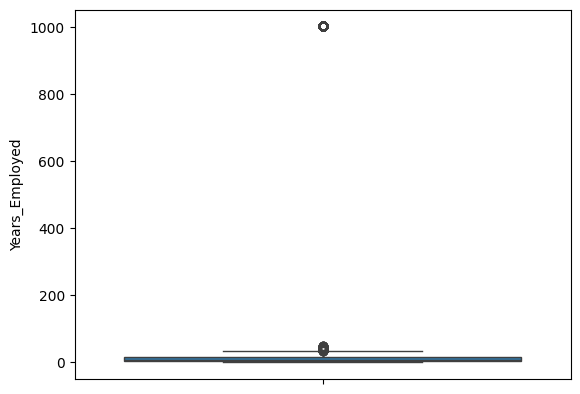

In [ ]:
#boxplot for Years_EMPLOYED:

sns.boxplot(application_data['Years_Employed'])
plt.show()

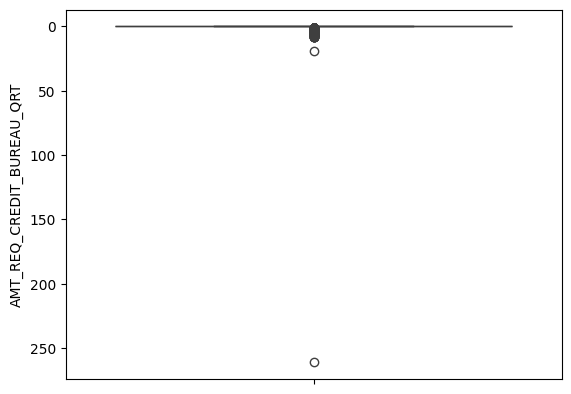

In [ ]:
#BOXPLOT FOR 'AMT_REQ_CREDIT_BUREAU_QRT'

sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

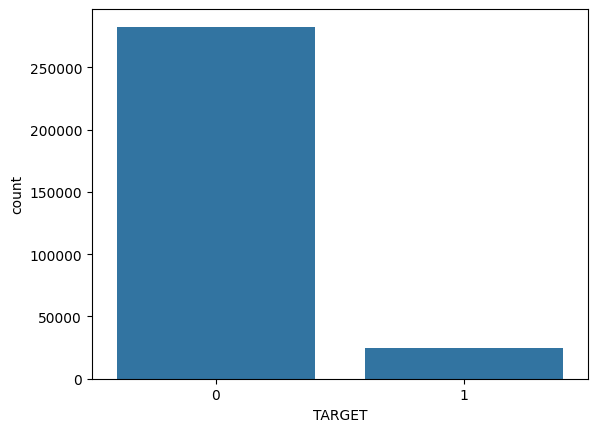

In [ ]:
#Countplot for 'Target'

sns.countplot(x=application_data['TARGET'])
plt.show()

In [ ]:
application_data['TARGET'].value_counts()

,count
TARGET,
0,282686
1,24825


In [ ]:
application_data['TARGET'].value_counts(normalize=True)

,proportion
TARGET,
0,0.919271
1,0.080729


In [ ]:
# creating a new data frame for target=0

target_0app=application_data[application_data['TARGET']==0]

target_0app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0-100000,250000-500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,100000-250000,100000-250000
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0-100000,250000-500000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,100000-250000,500000-750000


In [ ]:
#creating new dataframe for target=1
target_1app=application_data[application_data['TARGET']==1]
target_1app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-250000,750000-1000000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,100000-250000,1000000-1250000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100000-250000,250000-500000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,250000-500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100000-250000,250000-500000
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,100000-250000,1250000-1500000
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,100000-250000,250000-500000
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,100000-250000,500000-750000


In [ ]:
#Checking imbalance of above two data frames:

ratio = target_0app.shape[0]/target_1app.shape[0]
ratio

11.387150050352467

In [ ]:
target_0app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282686 entries, 1 to 307510
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  282686 non-null  object  
 1   TARGET                      282686 non-null  category
 2   NAME_CONTRACT_TYPE          282686 non-null  category
 3   CODE_GENDER                 282686 non-null  category
 4   FLAG_OWN_CAR                282686 non-null  category
 5   FLAG_OWN_REALTY             282686 non-null  category
 6   CNT_CHILDREN                282686 non-null  category
 7   AMT_INCOME_TOTAL            282686 non-null  float64 
 8   AMT_CREDIT                  282686 non-null  float64 
 9   AMT_ANNUITY                 282674 non-null  float64 
 10  AMT_GOODS_PRICE             282429 non-null  float64 
 11  NAME_TYPE_SUITE             281464 non-null  category
 12  NAME_INCOME_TYPE            282686 non-null  category
 13  NAME

In [ ]:
target_0app.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12


Non-numeric columns: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'Amt_Income_Range', 'Amt_Credit_Range'],
      dtype='object')


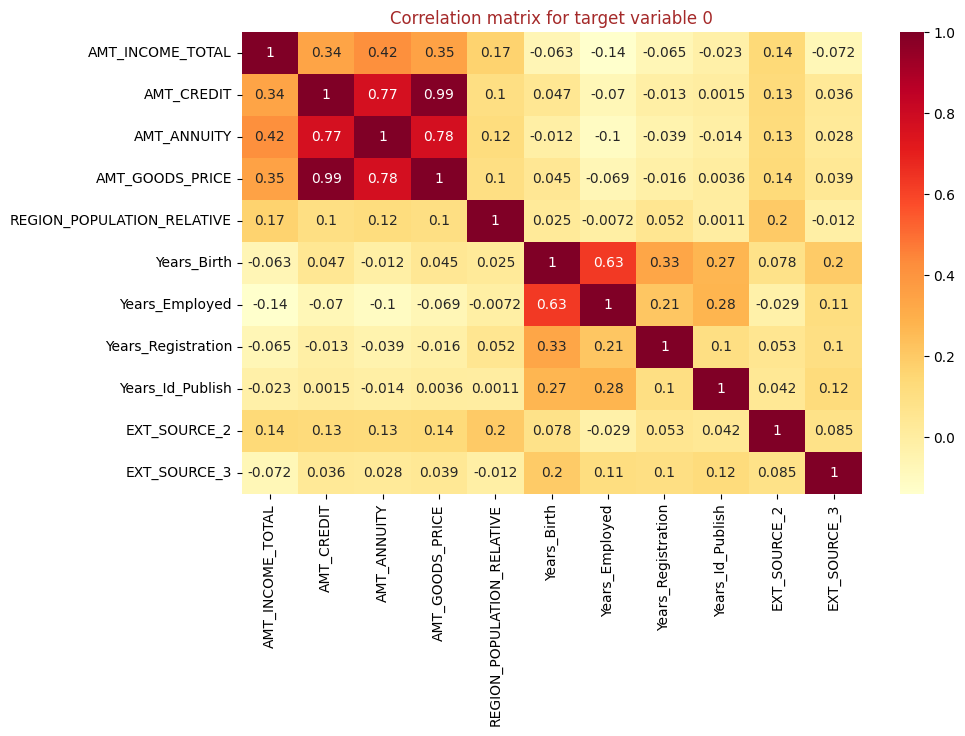

In [ ]:
#As there is a lot of imbalance,
#finding the correaltion between differet variables for both data frames with target=0 and target=1 could give some insights

#for target=0:

# Identify non-numeric columns
non_numeric_columns = target_0app.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Option 1: Drop non-numeric columns (if not needed)
target_0app_numeric = target_0app.drop(columns=non_numeric_columns)

# Option 2: Convert non-numeric columns to numeric (if needed)
# target_0app_numeric = pd.get_dummies(target_0app, drop_first=True)

# Plot the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(target_0app_numeric.corr(), cmap='YlOrRd', annot=True)
plt.title('Correlation matrix for target variable 0', color='brown')
plt.show()

Non-numeric columns: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'Amt_Income_Range', 'Amt_Credit_Range'],
      dtype='object')


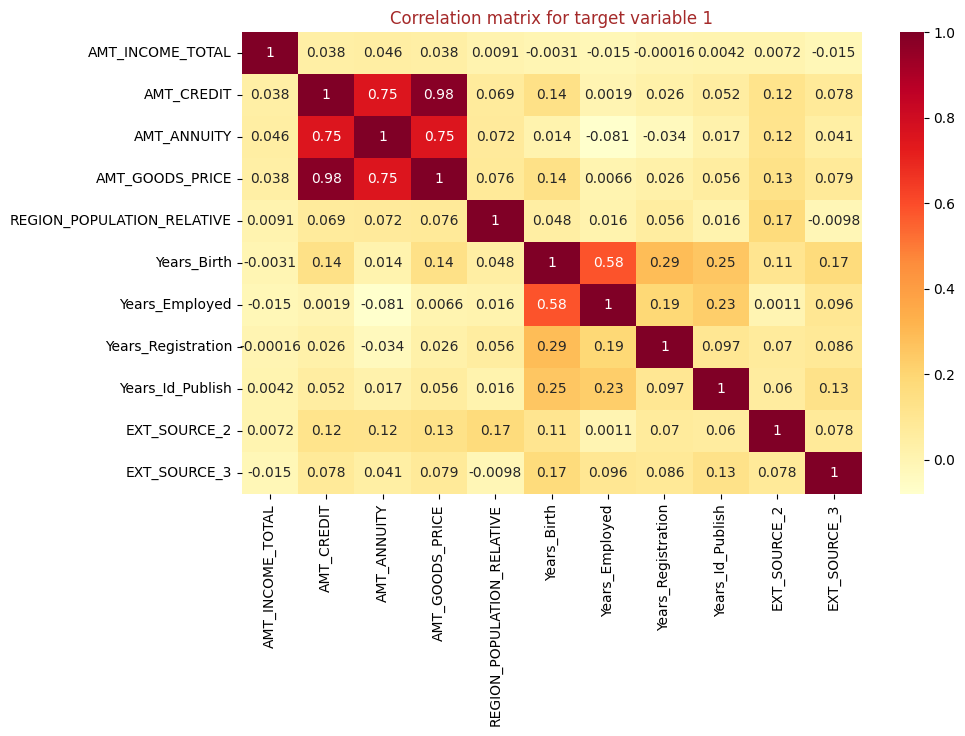

In [ ]:
# Identify non-numeric columns
non_numeric_columns = target_1app.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Option 1: Drop non-numeric columns (if not needed)
target_1app_numeric = target_1app.drop(columns=non_numeric_columns)

# Option 2: Convert non-numeric columns to numeric (if needed)
# target_0app_numeric = pd.get_dummies(target_0app, drop_first=True)

# Plot the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(target_1app_numeric.corr(), cmap='YlOrRd', annot=True)
plt.title('Correlation matrix for target variable 1', color='brown')
plt.show()

UNIVARIATE ANALYSIS


In [ ]:
#Let's get into the info

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

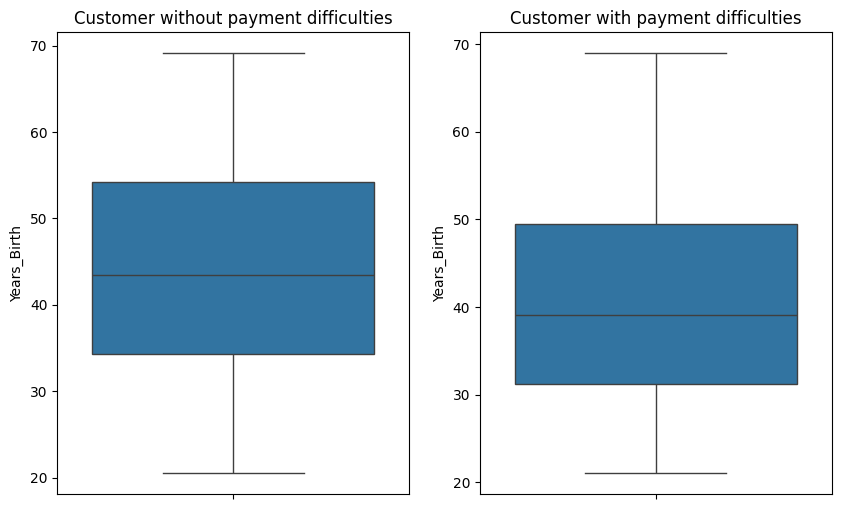

In [ ]:
#univariate analysis for 'Years_Birth'

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0app_numeric['Years_Birth'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(target_1app_numeric['Years_Birth'])
plt.title('Customer with payment difficulties')
plt.show()

From the above box plot: customer without payment difficulties having year in between 34 to 54 years ,
And customers with payment difficulties are in between 31 to 50 years.

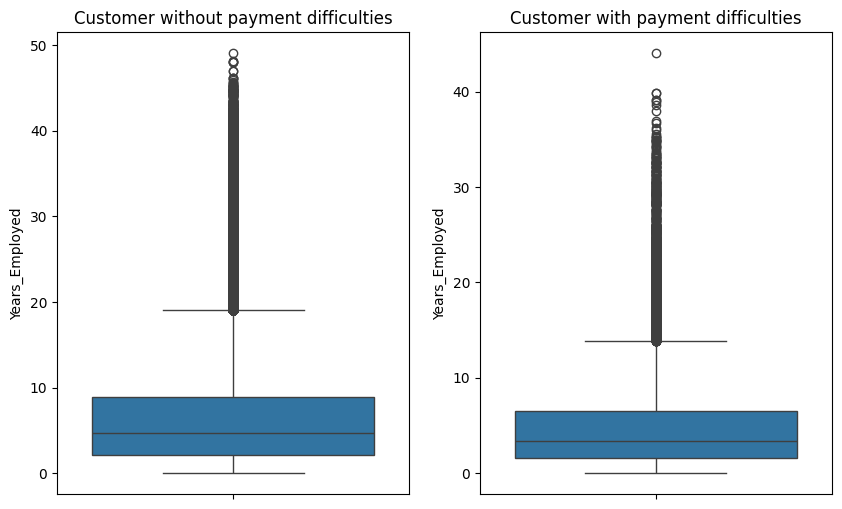

In [ ]:
#Lets do univariate analysis on variable 'Years_Employed'
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Customer without payment difficulties')
sns.boxplot(target_0app_numeric[target_0app_numeric['Years_Employed']<1000]['Years_Employed'])
plt.subplot(1,2,2)
plt.title('Customer with payment difficulties')
sns.boxplot(target_1app_numeric[target_1app_numeric['Years_Employed']<1000]['Years_Employed'])
plt.show()


From the above box plot : Customer without payment difficulties having year_employed in between 2 to 10 years ,
And customer with payment difficulties are in between 2 to 8 years.

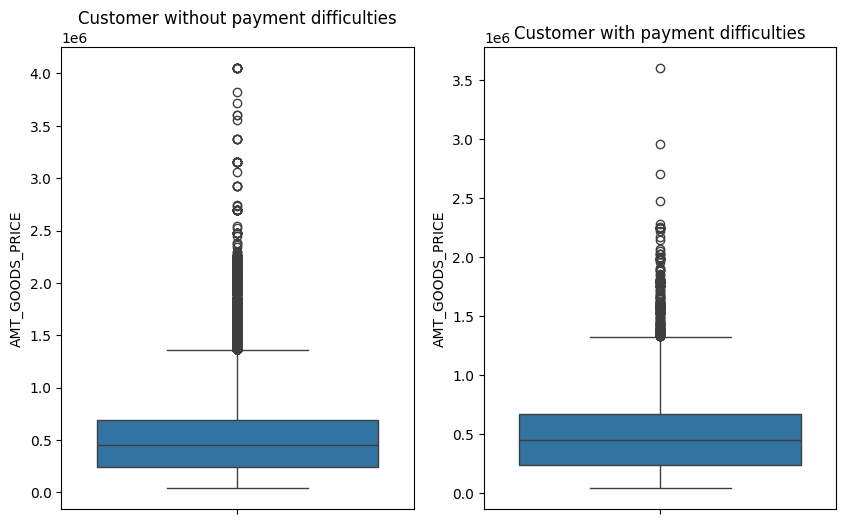

In [ ]:
#Univariate analysis on 'AMT_GOODS_PRICE'

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0app_numeric['AMT_GOODS_PRICE'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(target_1app_numeric['AMT_GOODS_PRICE'])
plt.title('Customer with payment difficulties')
plt.show()


From the above box plot, observations are : customer without payment difficulties having AMT_GOODS_PRICE in between 0.3 to 0.7,
And customer with payment difficulties having 'AMT_GOODS_PRICE' in between 0.3 to 0.7 .
It has median at around 0.5

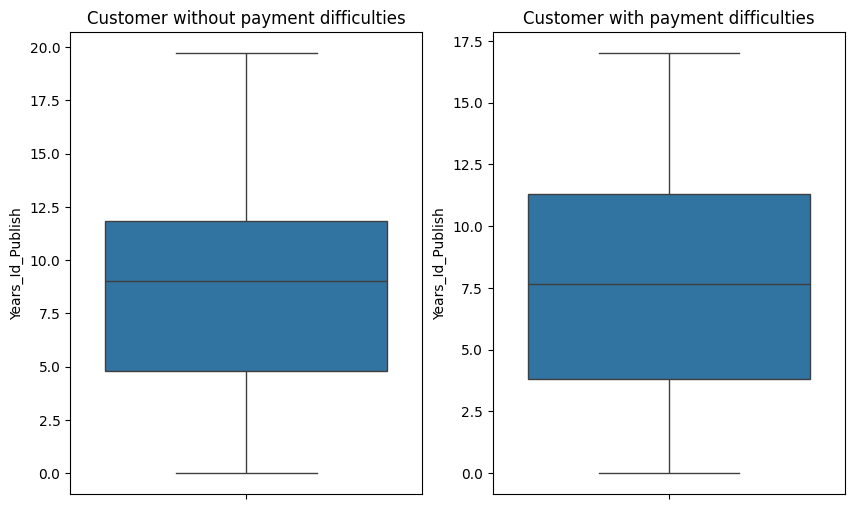

In [ ]:
#Univariate Analysis on YEARS_ID_PUBLISH

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0app_numeric['Years_Id_Publish'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(target_1app_numeric['Years_Id_Publish'])
plt.title('Customer with payment difficulties')
plt.show()

From the above box plot :  Customer without payment difficulties having YEARS_ID_PUBLISH in between 5 to 11 and customer with payment difficulties having 'AMT_GOODS_PRICE' are in between 3 to 11 years.

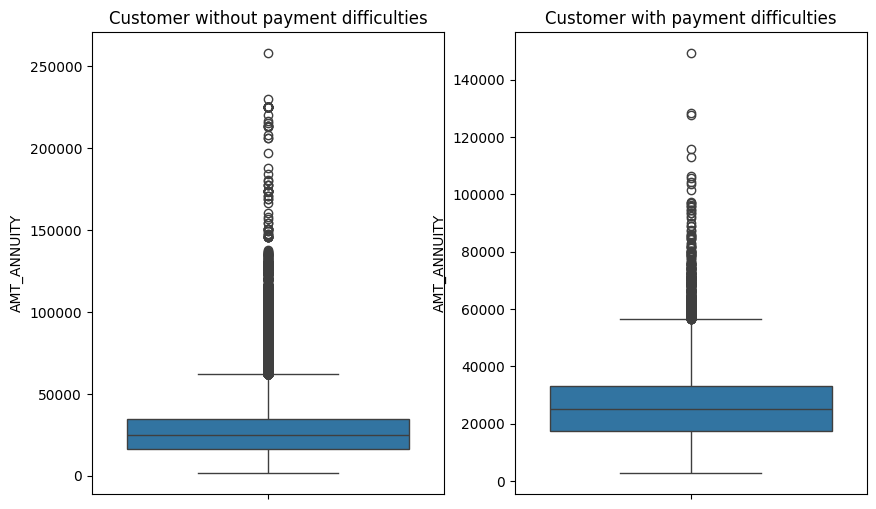

In [ ]:
#Univariate Analysis on AMT_ANNUITY

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0app_numeric['AMT_ANNUITY'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(target_1app_numeric['AMT_ANNUITY'])
plt.title('Customer with payment difficulties')
plt.show()

From the above box plot it is clear that customer without payment difficulties having AMT_ANNUITY in between 20000 to 30000,
and customer with payment difficulties having AMT_GOODS_PRICE in between 20000 to 30000 years.

##ANALYSIS FOR CATEGORICAL VARIABLES

In [ ]:
#Univariate Analysis on NAME_CONTRACT_TYPE

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0app['NAME_CONTRACT_TYPE'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(target_1app['NAME_CONTRACT_TYPE'])
plt.title('Customer with payment difficulties')
plt.show()


Here we can see that customer without payment difficulties and customer with payment difficulties are taking cash loans

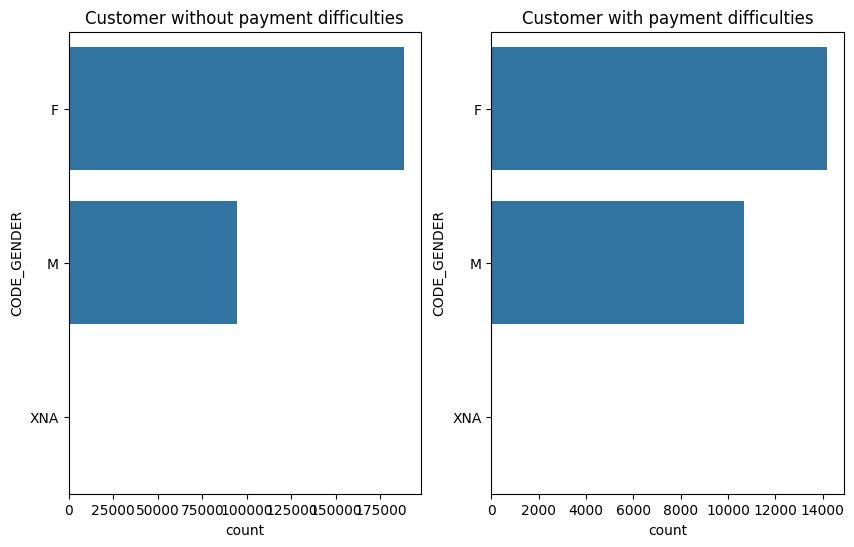

In [ ]:
#Univariate Analysis on CODE_GENDER

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0app['CODE_GENDER'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(target_1app['CODE_GENDER'])
plt.title('Customer with payment difficulties')
plt.show()

Here we can see that Females are more in number,in both cases which we have previously also observed just by value_counts and their mode!

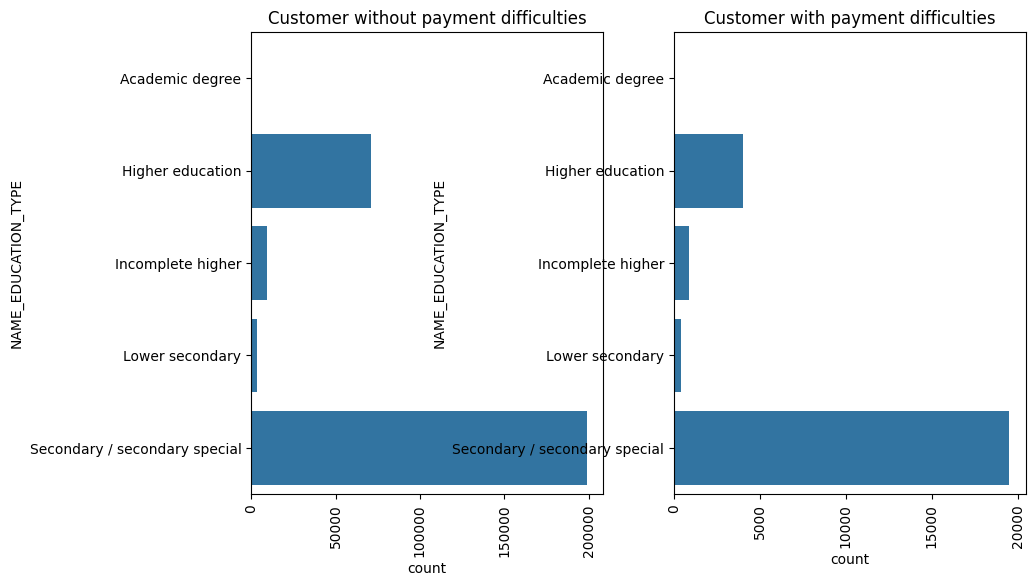

In [ ]:
#Univariate Analysis on NAME_EDUCATION_TYPE

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0app['NAME_EDUCATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1app['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

we can see that secondary/secondary special are more in number ,in both cases

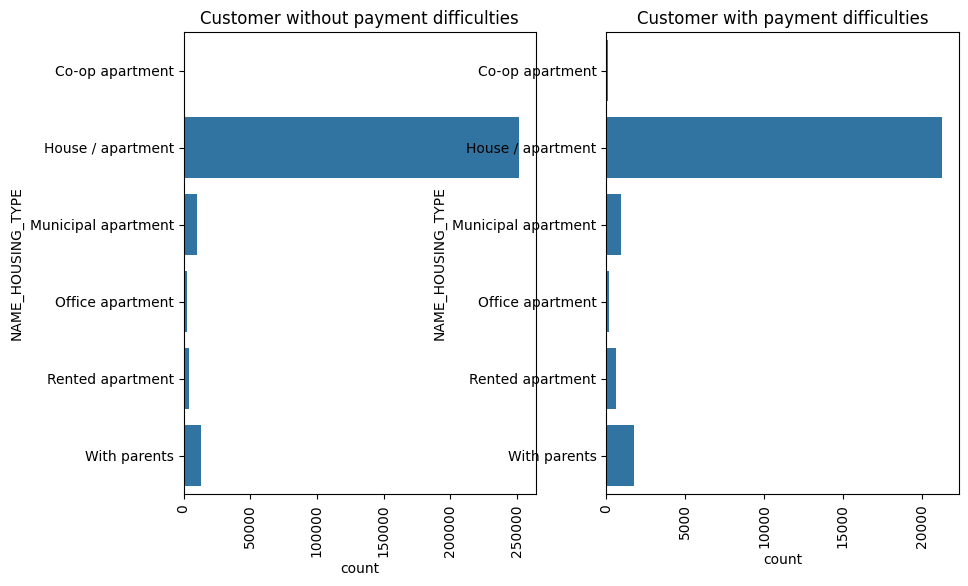

In [ ]:
#Univariate Analysis on NAME_HOUSING_TYPE

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0app['NAME_HOUSING_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1app['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

House/Apartment category are more in number in both cases
 meaning customers who take loans are found more in number for House/Apartment category in both cases

In [ ]:
#Univariate Analysis on OCCUPATION_TYPE

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0app['OCCUPATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1app['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()


It is observed that the labourers are facing more difficulty in paying loans along with sales staff and core staff facing difficulty in paying loans
and labourers are more in number in paying of loans too.

**BIVARIATE ANALYSIS**


###Numerical-Numerical bivariate analysis

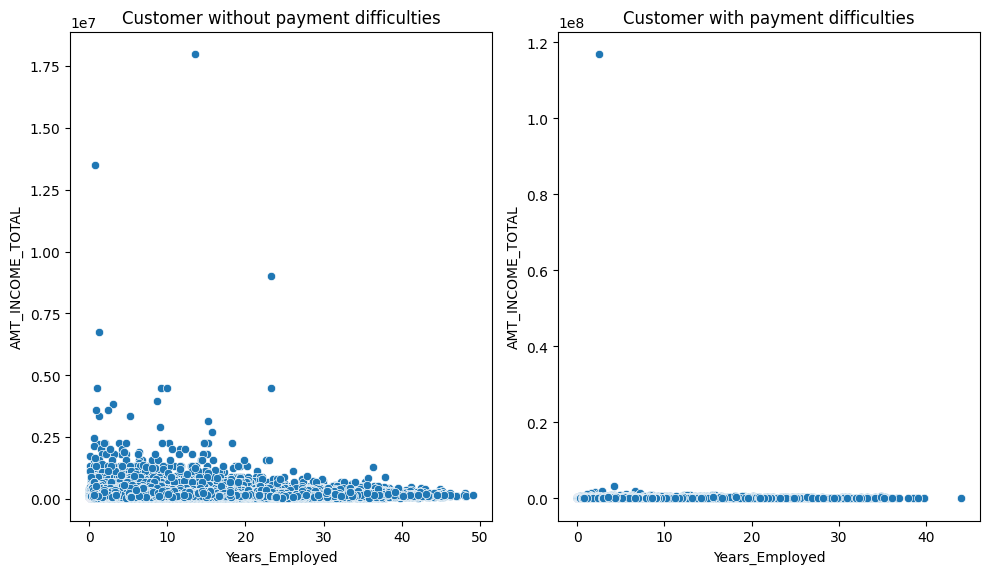

In [ ]:
#analysis on 'Years_Employed','AMT_INCOME_TOTAL'

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=target_0app_numeric[target_0app_numeric['Years_Employed']<1000],x='Years_Employed',y='AMT_INCOME_TOTAL')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=target_1app_numeric[target_1app_numeric['Years_Employed']<1000],x='Years_Employed',y='AMT_INCOME_TOTAL')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

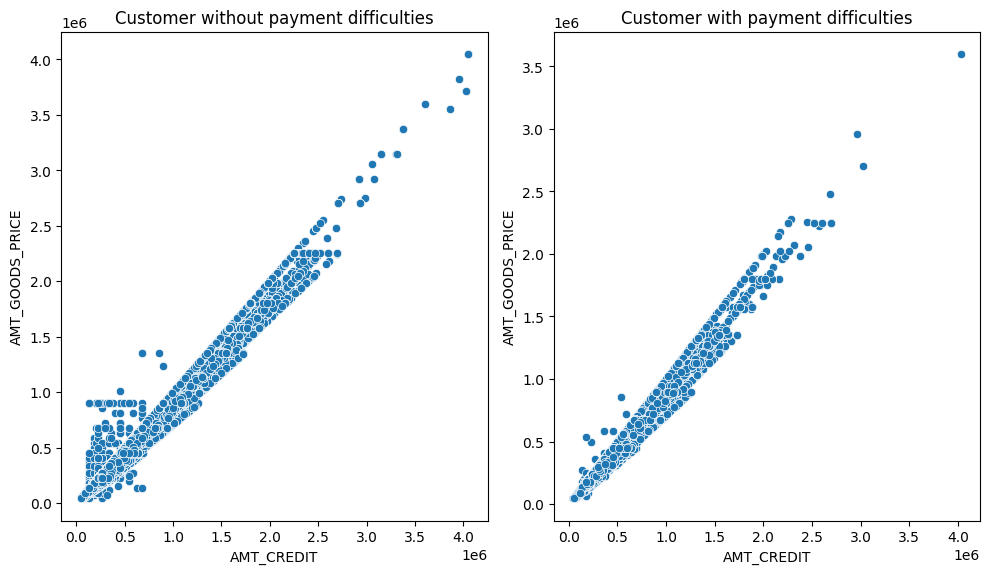

In [ ]:
#bivariate analysis on AMT_CREDIT and AMT_GOODS_PRICE

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=target_0app_numeric,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=target_1app_numeric,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

Goods price is positively correlated to credit amount (direct proportionality)

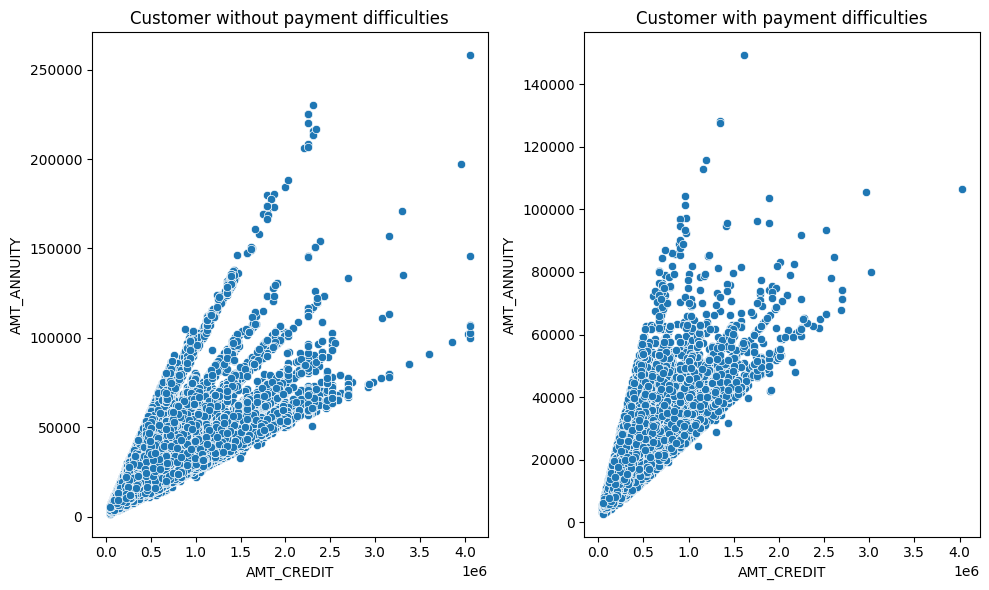

In [216]:
#bivariate analysis on 'AMT_CREDIT' and 'AMT_ANNUITY'

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=target_0app_numeric,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=target_1app_numeric,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

People with out payment difficulties take more credit for the annuity


###categorical - categorical bivariate analysis

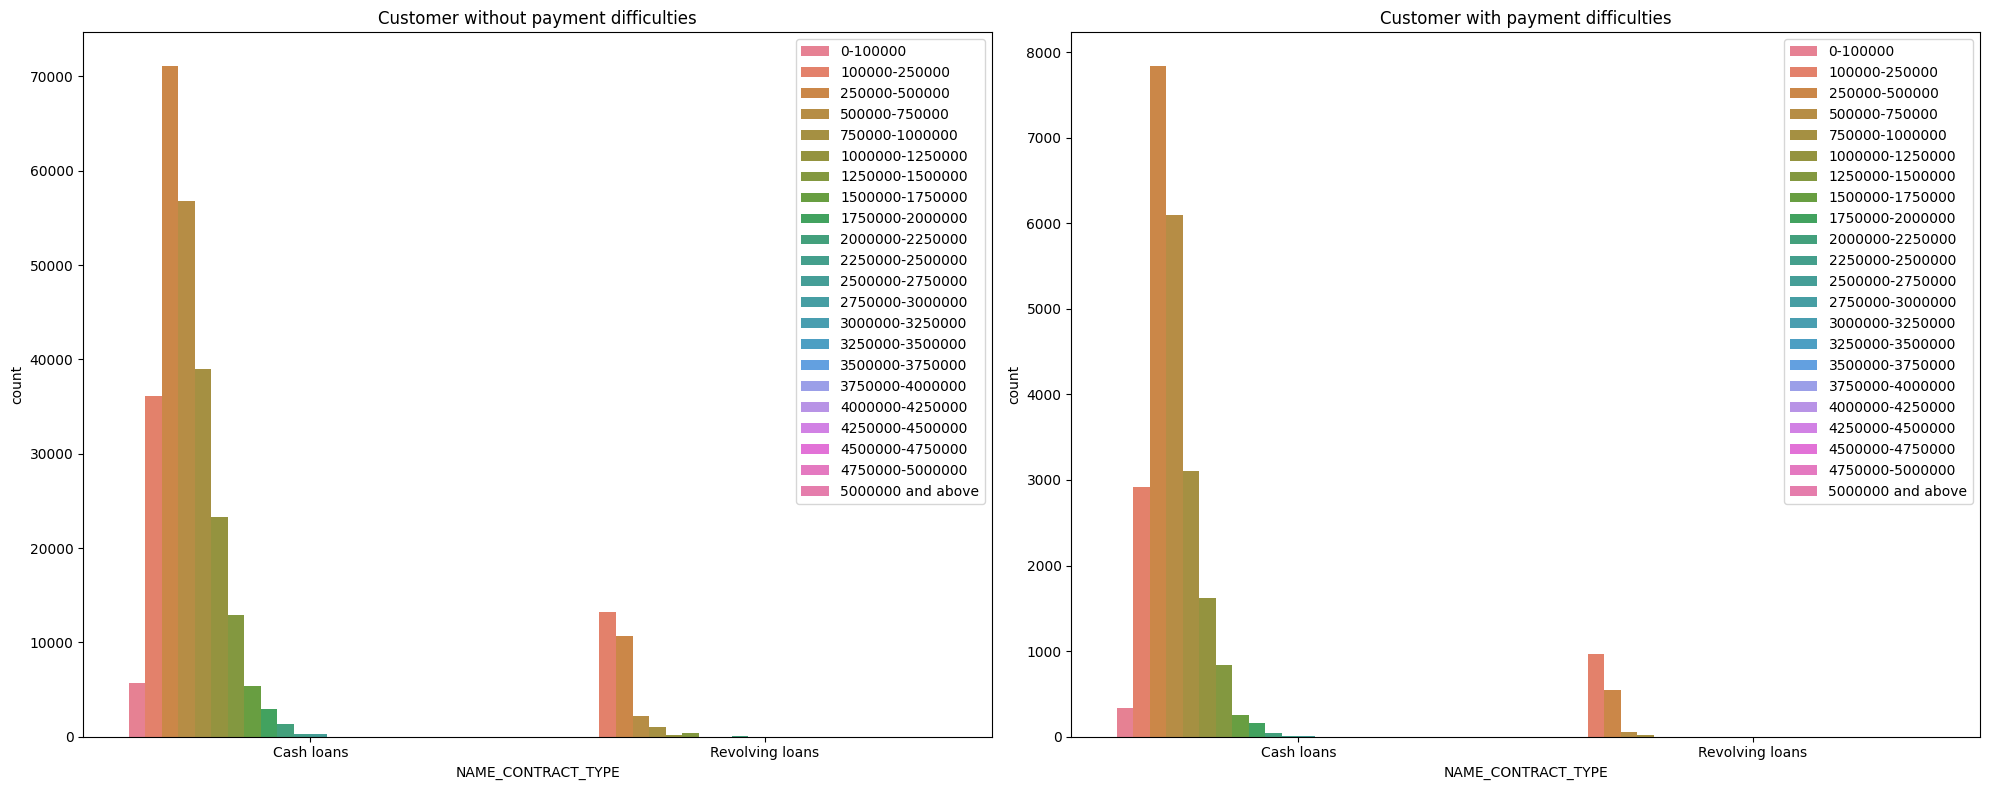

In [ ]:
#bivariate analysis on NAME_CONTRACT_TYPE and Amt_Credit_Range

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=target_0app,x='NAME_CONTRACT_TYPE',hue='Amt_Credit_Range')
plt.legend(loc='upper right')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(data=target_1app,x='NAME_CONTRACT_TYPE',hue='Amt_Credit_Range')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

Most of the people taking cash loans and people without facing payment diffculties have revolving loans more than other case


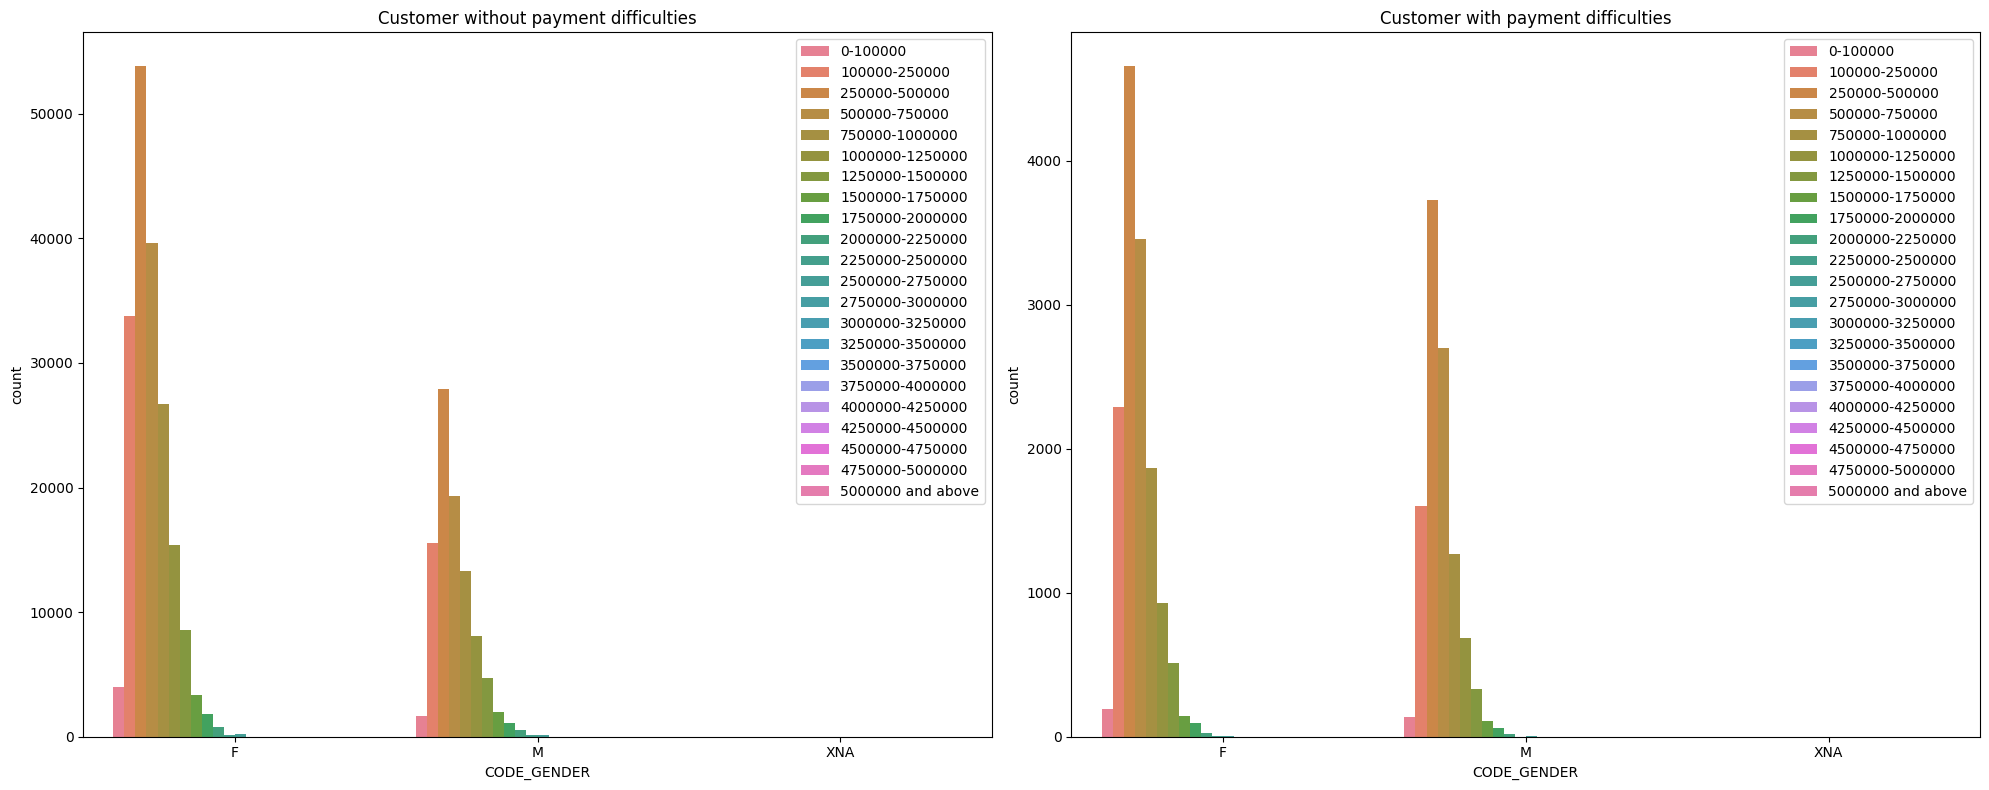

In [217]:
#bivariate analysis on CODE_GENDER and Amt_Credit_Range

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=target_0app,x='CODE_GENDER',hue='Amt_Credit_Range')
plt.legend(loc='upper right')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(data=target_1app,x='CODE_GENDER',hue='Amt_Credit_Range')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

Females are more in number taking loans and females have more amount credit range in both cases


###numerical - categorical bivariate analysis

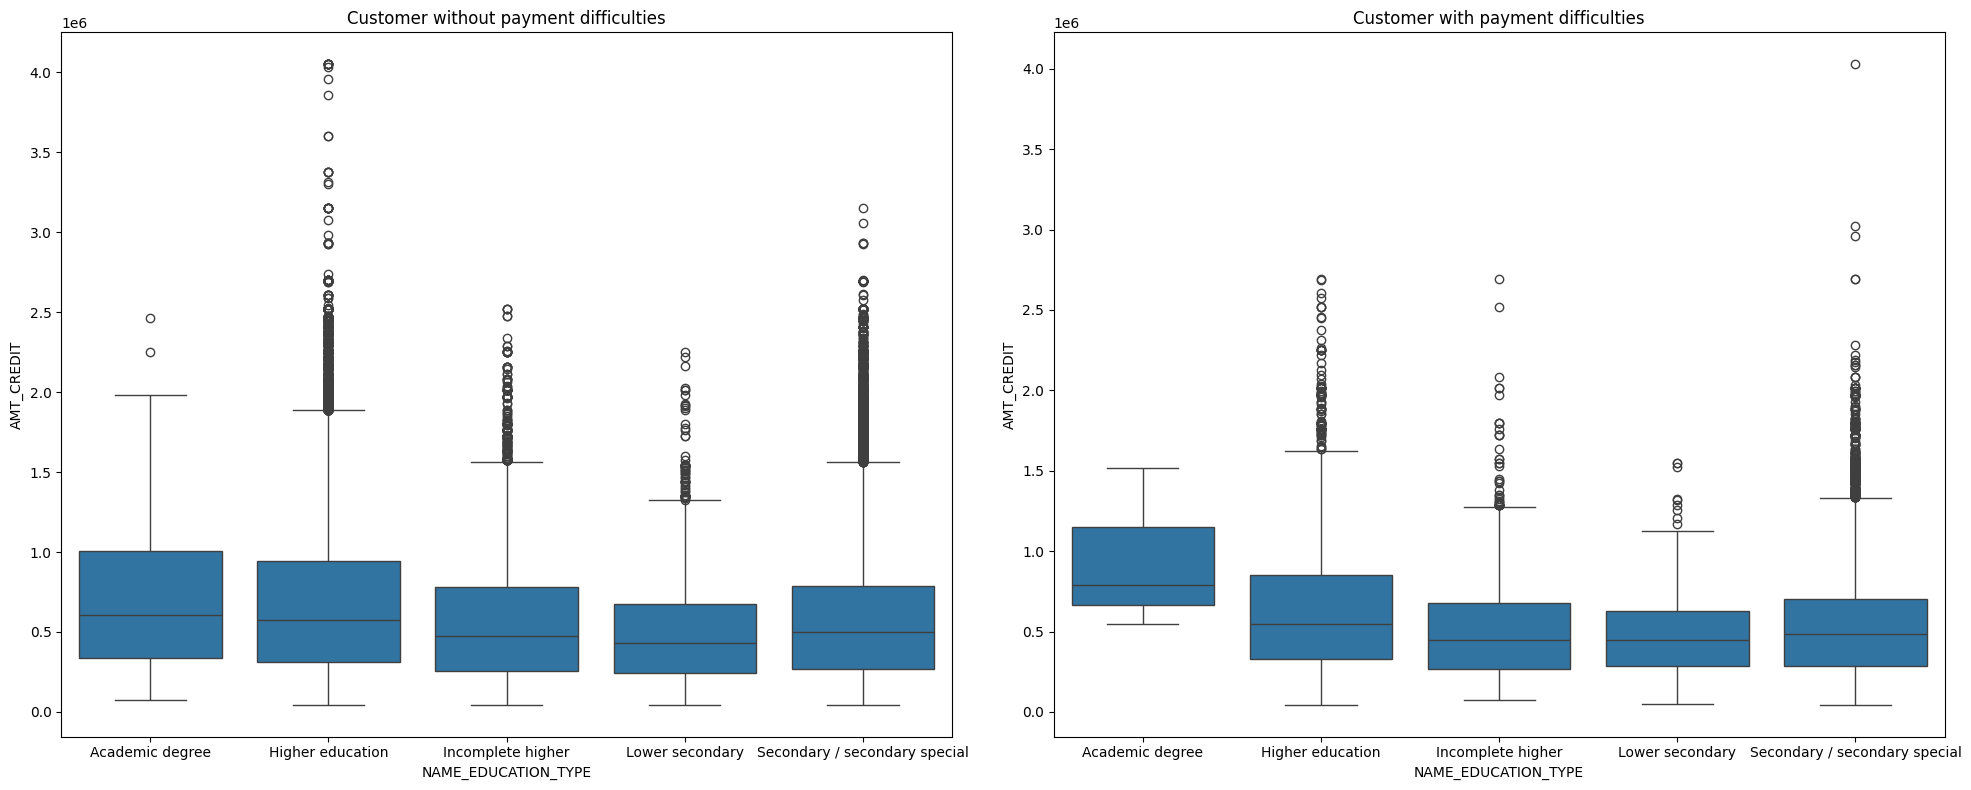

In [ ]:
#bivariate analysis on AMT_CREDIT and NAME_EDUCATION_TYPE

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=target_0app,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(data=target_1app,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

In [ ]:
#The range of customers with payment difficulties of academic degree is higher than wihtout payment difficulties, rest of education type is similar to each other

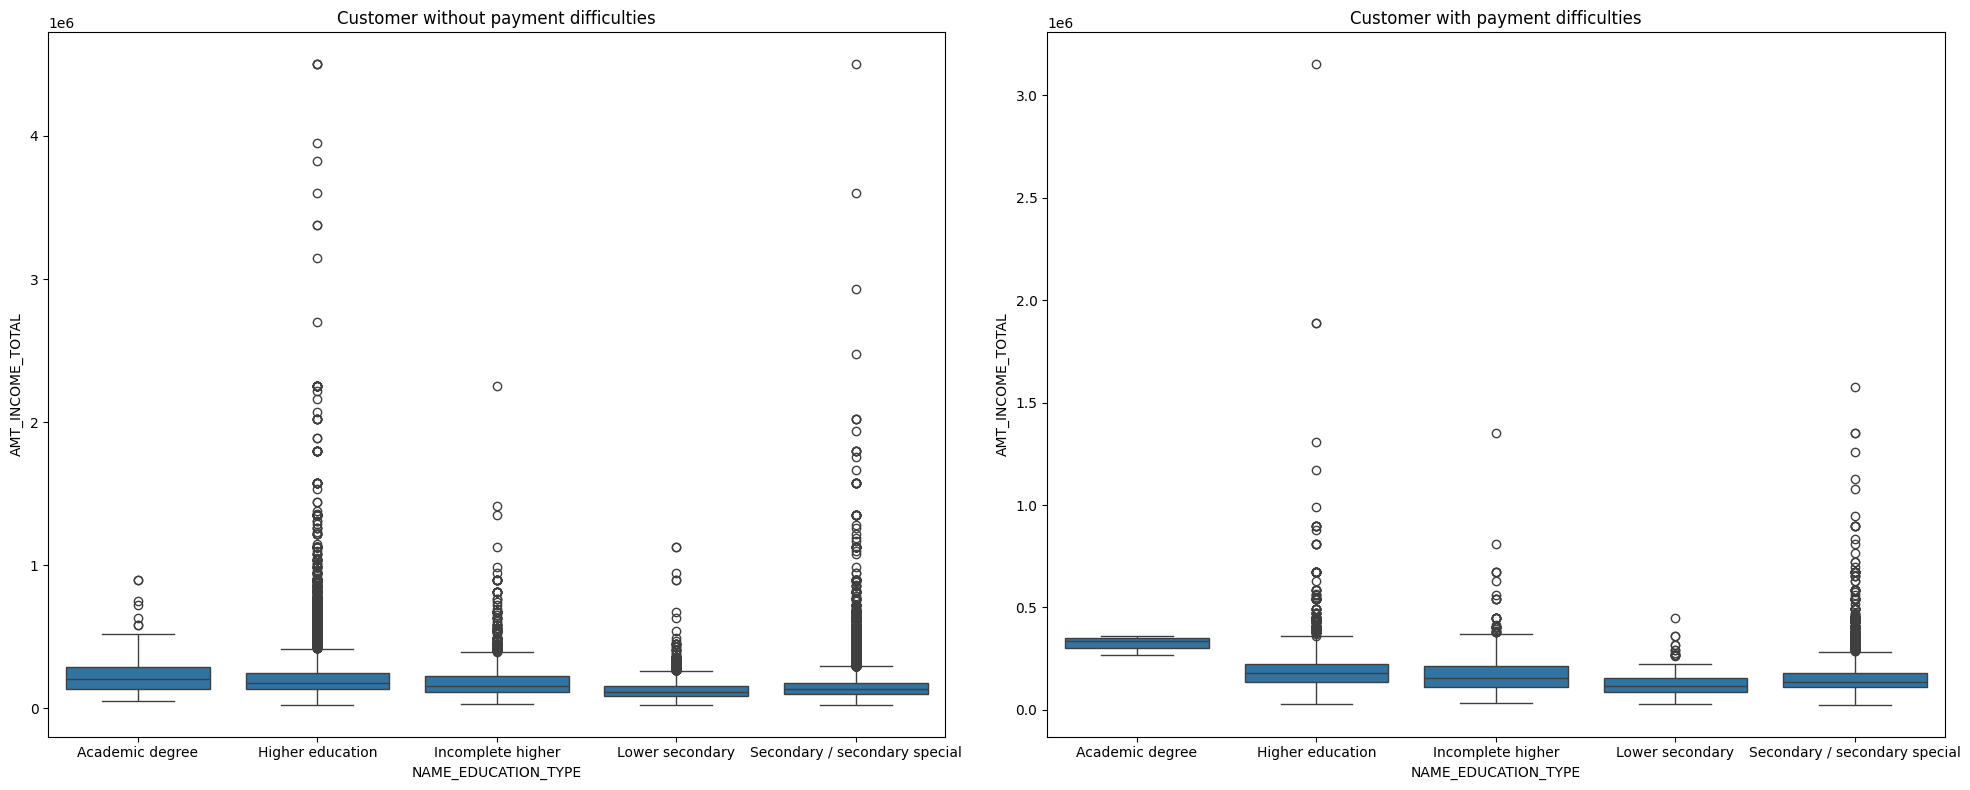

In [ ]:
#bivariate analysis on AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=target_0app[target_0app['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(data=target_1app[target_1app['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

customer without payment difficulties are having more outliers than compared to customer with payment difficulties


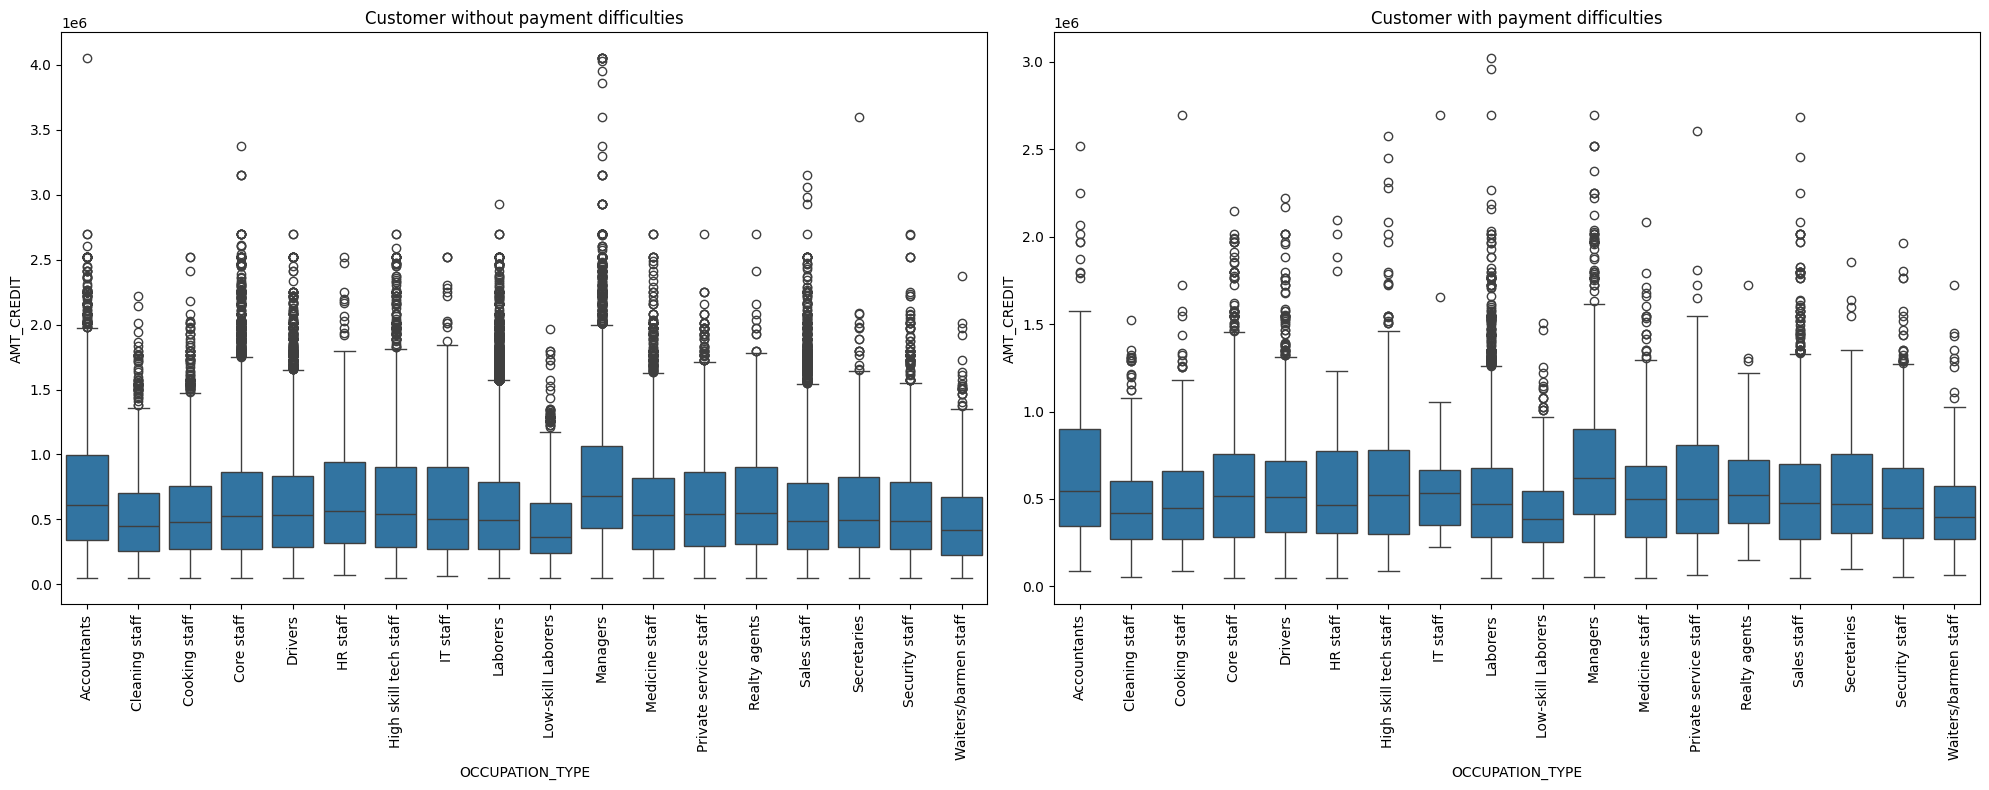

In [ ]:
#bivariate analysis on AMT_CREDIT and OCCUPATION_TYPE

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=target_0app,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(data=target_1app,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 range of the customers without payment more as compare to the customers with payment.


##MERGING: application_data and previous_application DATAFRAMES.

In [ ]:

application_data_initial = pd.read_csv('application_data.csv')

In [ ]:
application_data_initial.shape

In [ ]:
merged_data = pd.merge(left=application_data_initial,right=previous_application,how='inner',on='SK_ID_CURR')
merged_data.shape

In [ ]:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [218]:
merged_data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0
1413700,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Connectivity,6.0,high,POS mobile with interest,365243.0,-469.0,-319.0,-409.0,-400.0,0.0


In [219]:
#checking percentage of 'NAME_CONTRACT_STATUS'

merged_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100


,proportion
NAME_CONTRACT_STATUS,
Approved,62.679378
Canceled,18.351900
Refused,17.357984
Unused offer,1.610737


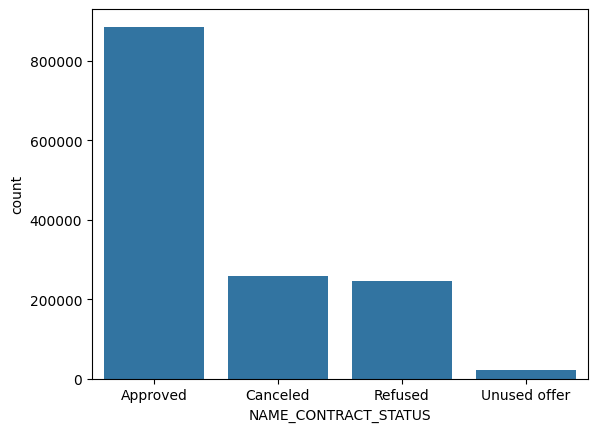

In [220]:
#countplot for the same attribute

sns.countplot(data=merged_data,x='NAME_CONTRACT_STATUS')
plt.show()

In [221]:
merged_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

,proportion
NAME_CONTRACT_STATUS,
Approved,62.679378
Canceled,18.351900
Refused,17.357984
Unused offer,1.610737


In [222]:
approved = merged_data[merged_data['NAME_CONTRACT_STATUS']=='Approved']
refused = merged_data[merged_data['NAME_CONTRACT_STATUS']=='Refused']
cancelled=merged_data[merged_data['NAME_CONTRACT_STATUS']=='Canceled']
unused_offer=merged_data[merged_data['NAME_CONTRACT_STATUS']=='Unused offer']

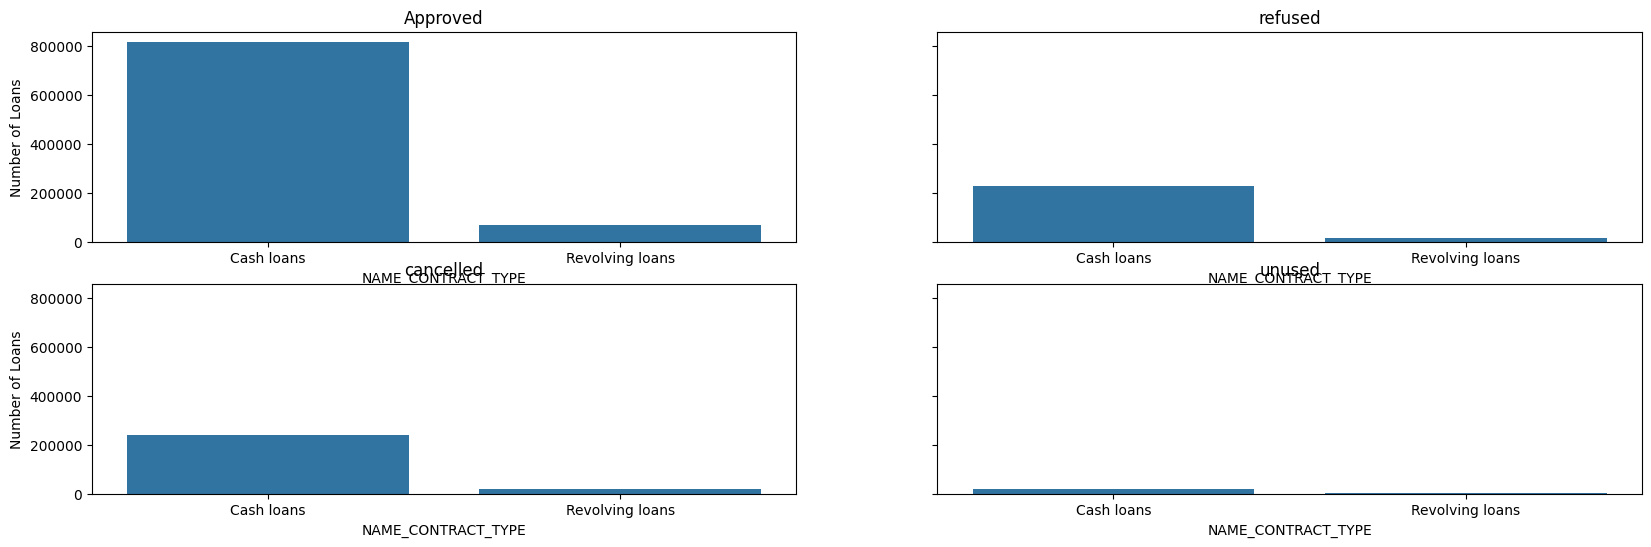

In [ ]:
#Analysis on variable 'NAME_CONTRACT_TYPE_x'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_CONTRACT_TYPE_x')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_CONTRACT_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_CONTRACT_TYPE_x')
ax2.set_title('refused')
ax2.set_xlabel('NAME_CONTRACT_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=cancelled,x='NAME_CONTRACT_TYPE_x')
ax3.set_title('cancelled')
ax3.set_xlabel('NAME_CONTRACT_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_offer,x='NAME_CONTRACT_TYPE_x')
ax4.set_title('unused')
ax4.set_xlabel('NAME_CONTRACT_TYPE')
ax4.set_ylabel('Number of Loans')
plt.show()

Revolving loan is much more acceptable as compare to the cash and consumer loans

In [ ]:
#Analysis on variable 'NAME_CLIENT_TYPE'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_CLIENT_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_CLIENT_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_CLIENT_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_CLIENT_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=cancelled,x='NAME_CLIENT_TYPE')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_CLIENT_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_offer,x='NAME_CLIENT_TYPE')
ax4.set_title('unused_')
ax4.set_xlabel('NAME_CLIENT_TYPE')
ax4.set_ylabel('Number of Loans')
plt.show()

Repeater is getting more Refused & more apporved and even that it is getting more cancelled & more usused.

In [ ]:
#Analysis on variable 'CODE_GENDER'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='CODE_GENDER')
ax1.set_title('Approved')
ax1.set_xlabel('CODE_GENDER')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='CODE_GENDER')
ax2.set_title('refused')
ax2.set_xlabel('CODE_GENDER')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=cancelled,x='CODE_GENDER')
ax3.set_title('cancelled')
ax3.set_xlabel('CODE_GENDER')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_offer,x='CODE_GENDER')
ax4.set_title('unused')
ax4.set_xlabel('CODE_GENDER')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

'Female' is getting more Refused & more approved & more cancelled &more unused.
However, 'Male' it is having average in every category.

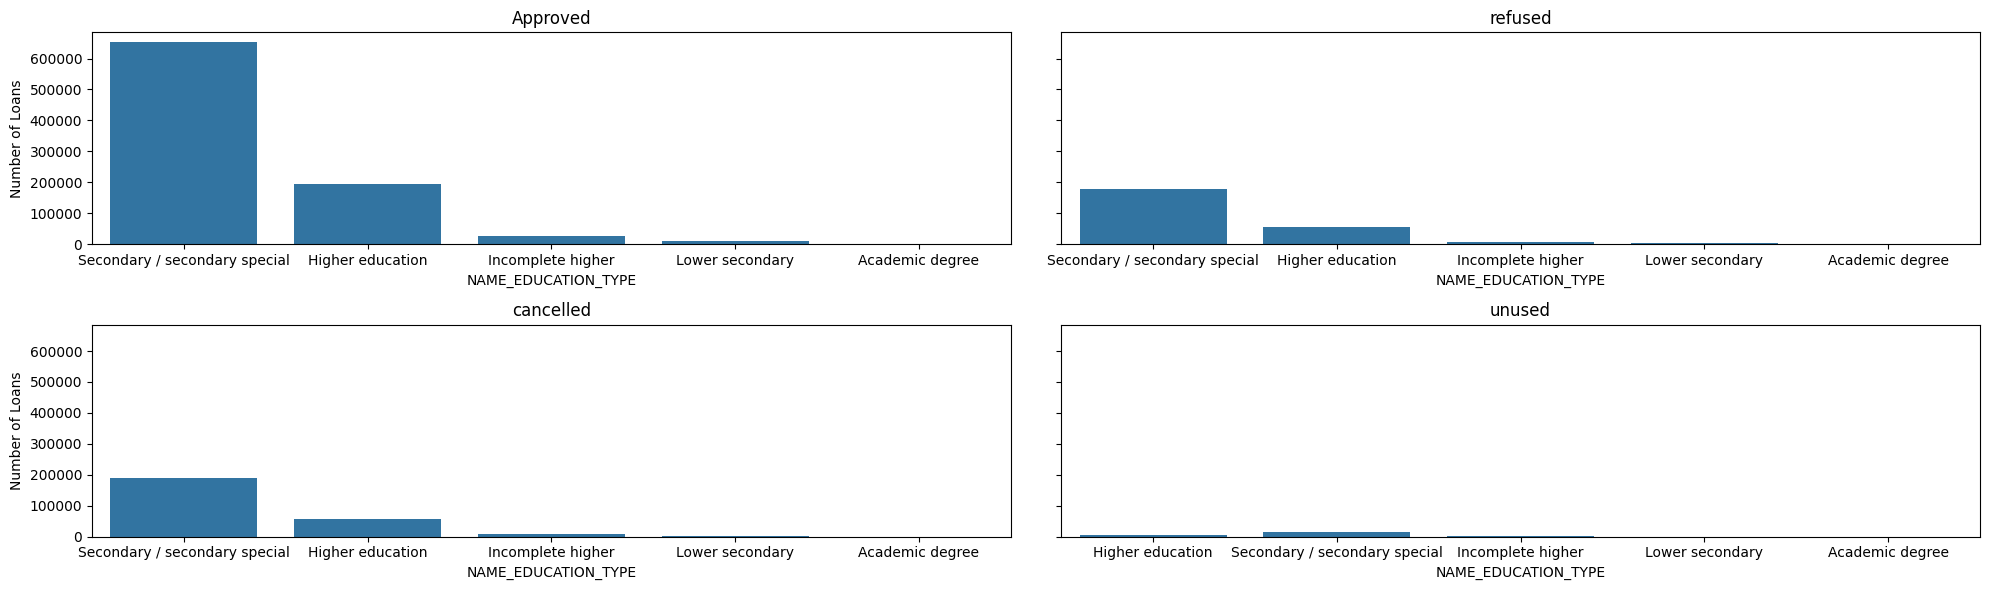

In [ ]:
#Analysis on variable 'NAME_EDUCATION_TYPE'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_EDUCATION_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_EDUCATION_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_EDUCATION_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_EDUCATION_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=cancelled,x='NAME_EDUCATION_TYPE')
ax3.set_title('cancelled')
ax3.set_xlabel('NAME_EDUCATION_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_offer,x='NAME_EDUCATION_TYPE')
ax4.set_title('unused')
ax4.set_xlabel('NAME_EDUCATION_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

Secondary/ Secondary special is more in every case

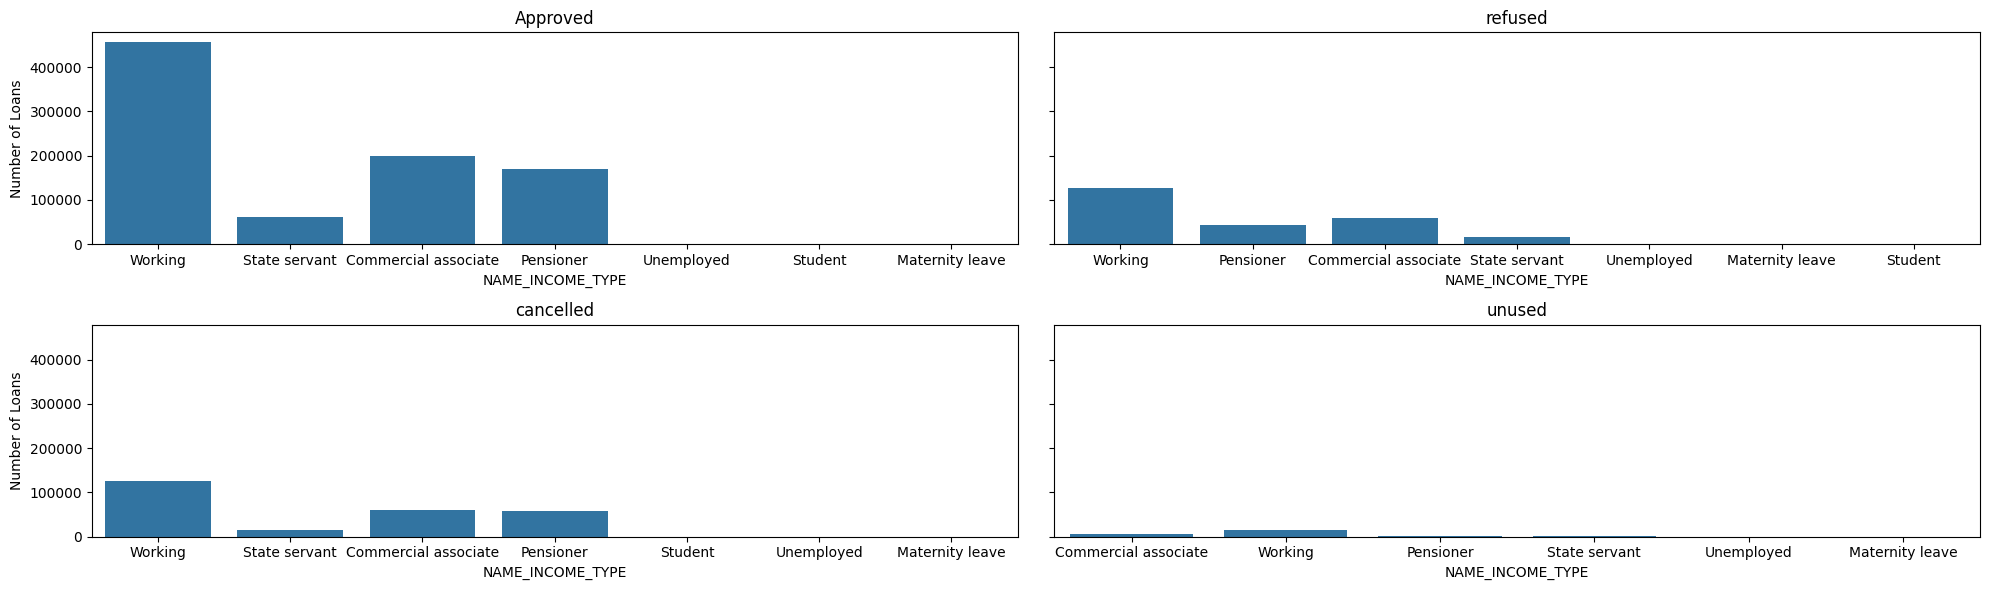

In [223]:
#Analysis on variable 'NAME_INCOME_TYPE'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_INCOME_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_INCOME_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_INCOME_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_INCOME_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=cancelled,x='NAME_INCOME_TYPE')
ax3.set_title('cancelled')
ax3.set_xlabel('NAME_INCOME_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_offer,x='NAME_INCOME_TYPE')
ax4.set_title('unused')
ax4.set_xlabel('NAME_INCOME_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

The working people are applying more loans as compare to others
and Commercial associates people are also seem to be taking more loans.


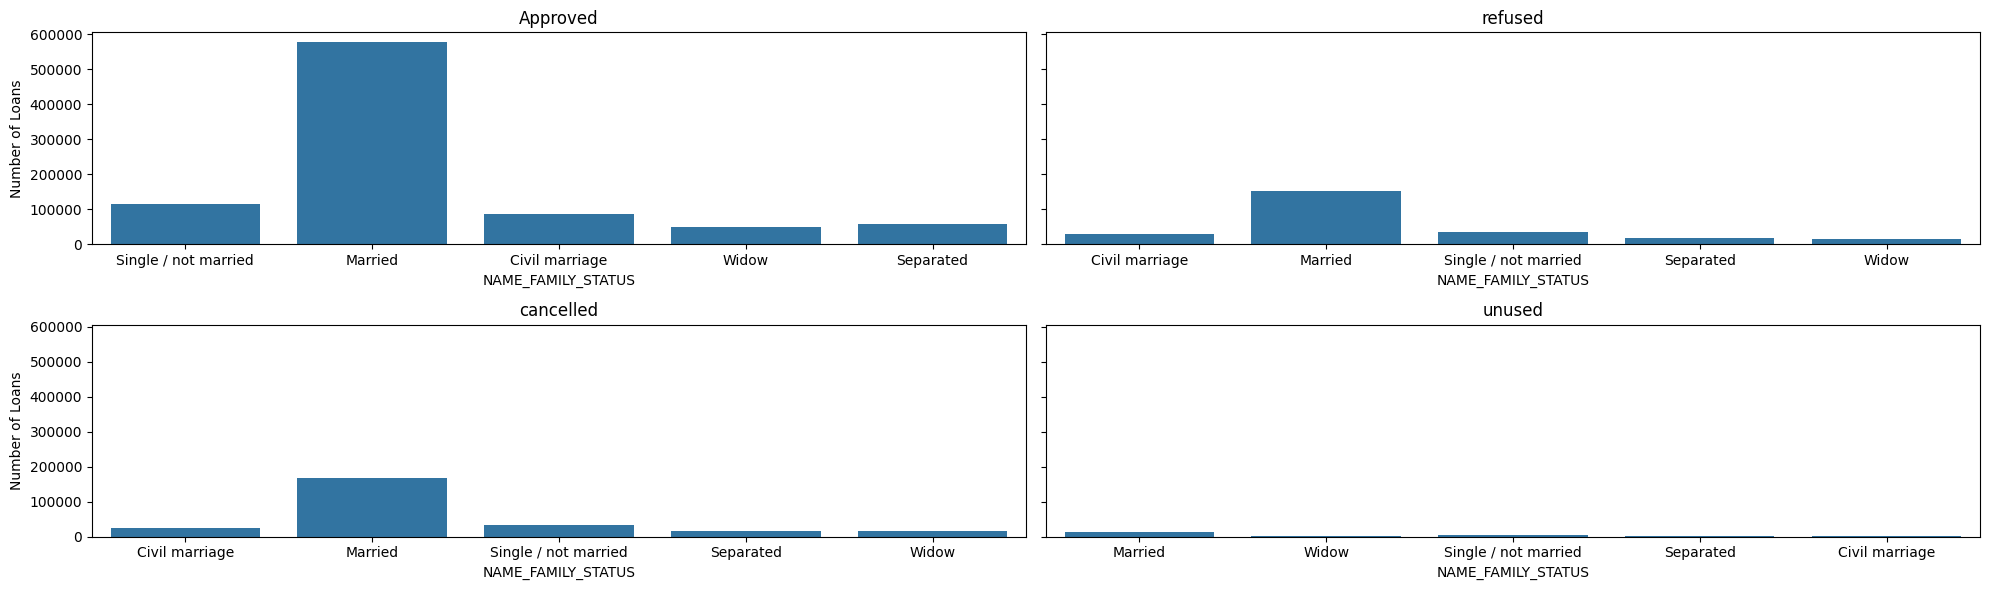

In [224]:
#Analysis on variable 'NAME_FAMILY_STATUS'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_FAMILY_STATUS')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_FAMILY_STATUS')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_FAMILY_STATUS')
ax2.set_title('refused')
ax2.set_xlabel('NAME_FAMILY_STATUS')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=cancelled,x='NAME_FAMILY_STATUS')
ax3.set_title('cancelled')
ax3.set_xlabel('NAME_FAMILY_STATUS')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_offer,x='NAME_FAMILY_STATUS')
ax4.set_title('unused')
ax4.set_xlabel('NAME_FAMILY_STATUS')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

Married people are applying and taking loans more than the others.

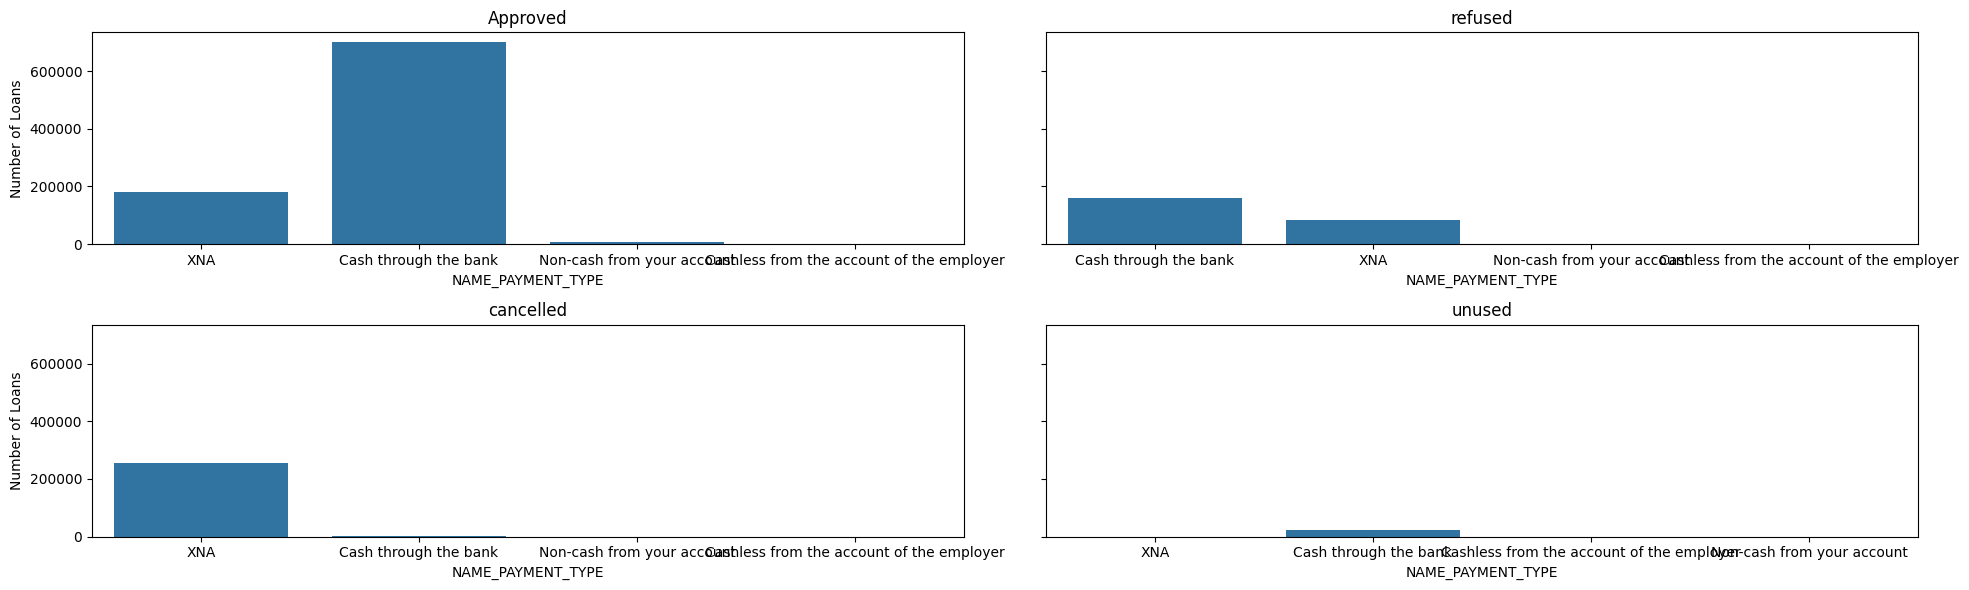

In [225]:
#Analysis on variable 'NAME_PAYMENT_TYPE'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_PAYMENT_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_PAYMENT_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_PAYMENT_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_PAYMENT_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=cancelled,x='NAME_PAYMENT_TYPE')
ax3.set_title('cancelled')
ax3.set_xlabel('NAME_PAYMENT_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_offer,x='NAME_PAYMENT_TYPE')
ax4.set_title('unused')
ax4.set_xlabel('NAME_PAYMENT_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

loans taken via 'Cast through the bank' is more and also got approved more.

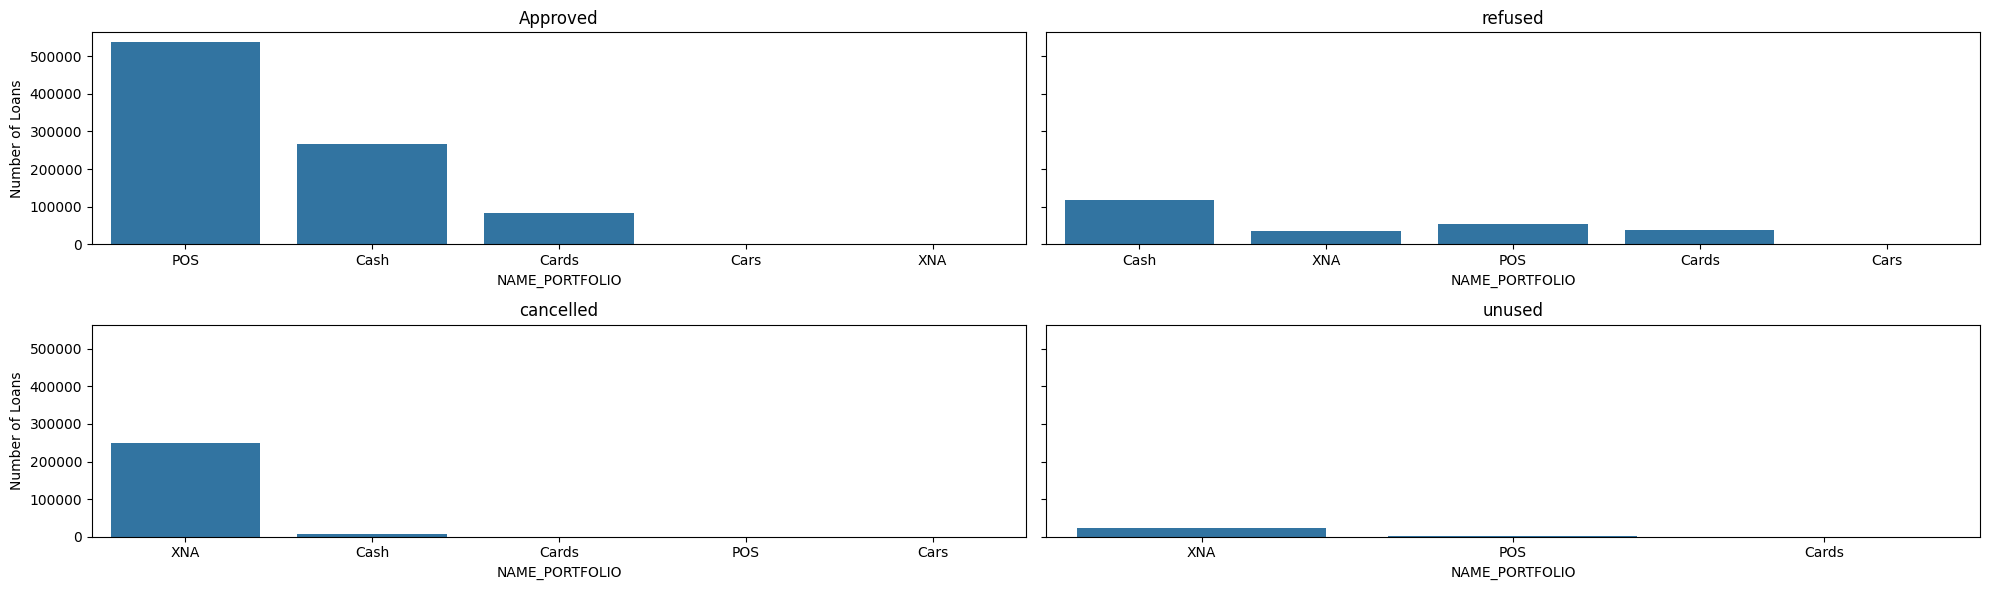

In [226]:
#Analysis on variable 'NAME_PORTFOLIO'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_PORTFOLIO')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_PORTFOLIO')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_PORTFOLIO')
ax2.set_title('refused')
ax2.set_xlabel('NAME_PORTFOLIO')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=cancelled,x='NAME_PORTFOLIO')
ax3.set_title('cancelled')
ax3.set_xlabel('NAME_PORTFOLIO')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_offer,x='NAME_PORTFOLIO')
ax4.set_title('unused')
ax4.set_xlabel('NAME_PORTFOLIO')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

most approved loan were through Cash and Most refused loans were in POS


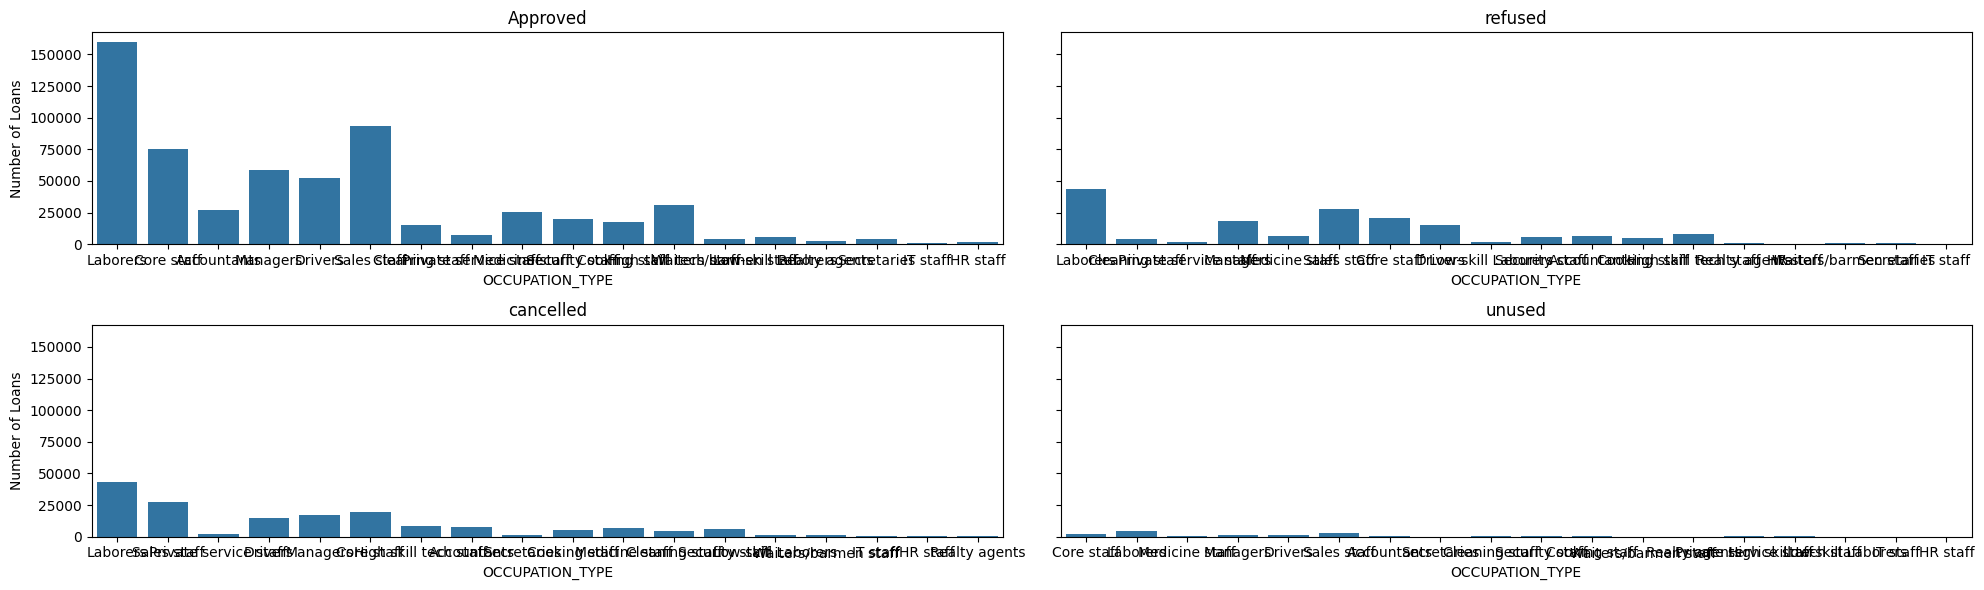

In [227]:

#Analysis on variable 'OCCUPATION_TYPE'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='OCCUPATION_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('OCCUPATION_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='OCCUPATION_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('OCCUPATION_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=cancelled,x='OCCUPATION_TYPE')
ax3.set_title('cancelled')
ax3.set_xlabel('OCCUPATION_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_offer,x='OCCUPATION_TYPE')
ax4.set_title('unused')
ax4.set_xlabel('OCCUPATION_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

labourers are getting most refused and most approved loans.
And Sales staff is getting the second most refused and approved loans.

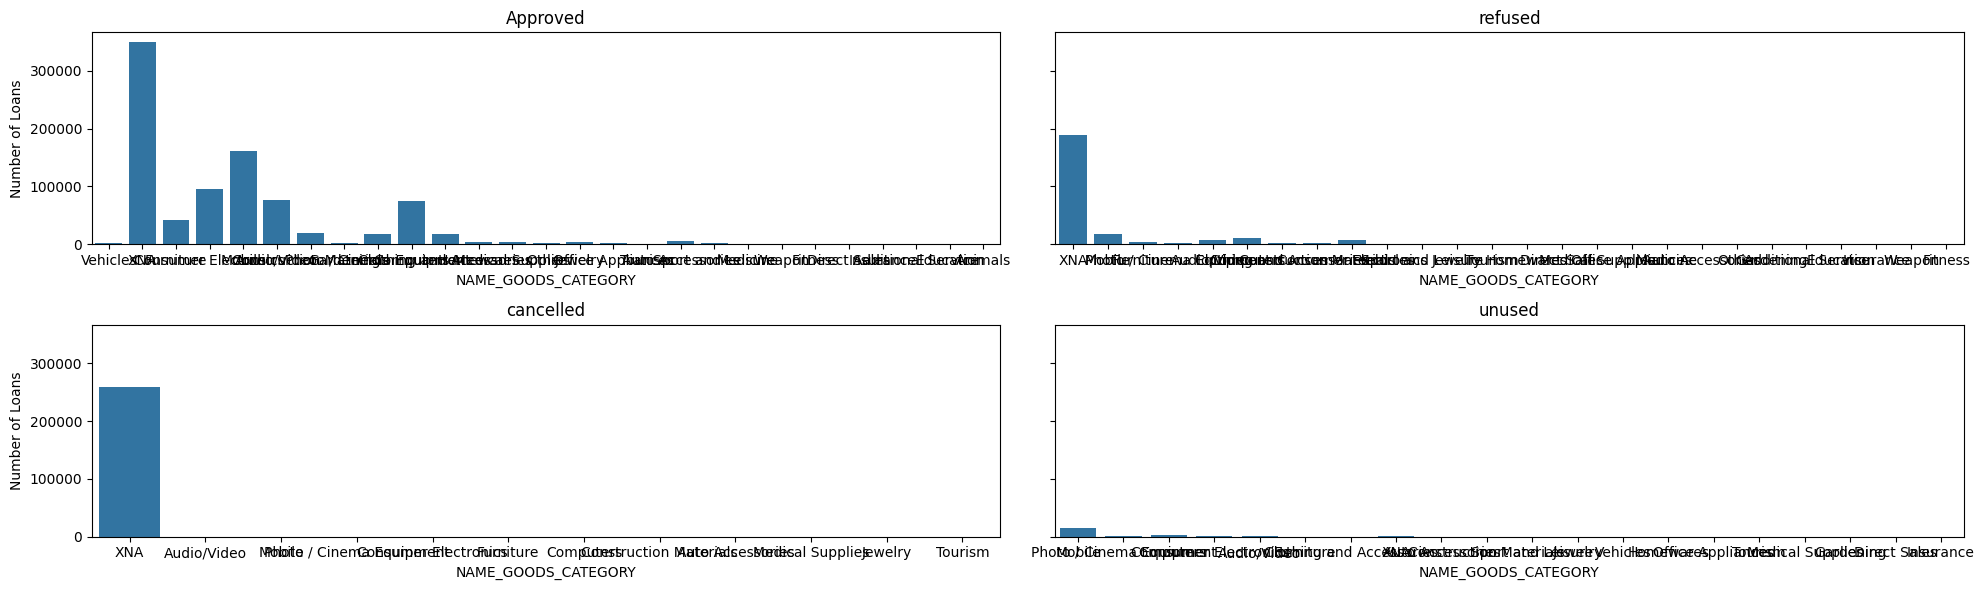

In [228]:
#Analysis on variable 'NAME_GOODS_CATEGORY'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_GOODS_CATEGORY')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_GOODS_CATEGORY')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_GOODS_CATEGORY')
ax2.set_title('refused')
ax2.set_xlabel('NAME_GOODS_CATEGORY')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=cancelled,x='NAME_GOODS_CATEGORY')
ax3.set_title('cancelled')
ax3.set_xlabel('NAME_GOODS_CATEGORY')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_offer,x='NAME_GOODS_CATEGORY')
ax4.set_title('unused')
ax4.set_xlabel('NAME_GOODS_CATEGORY')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

Most Refused loan is of Mobile and most approved loan is Mobile.

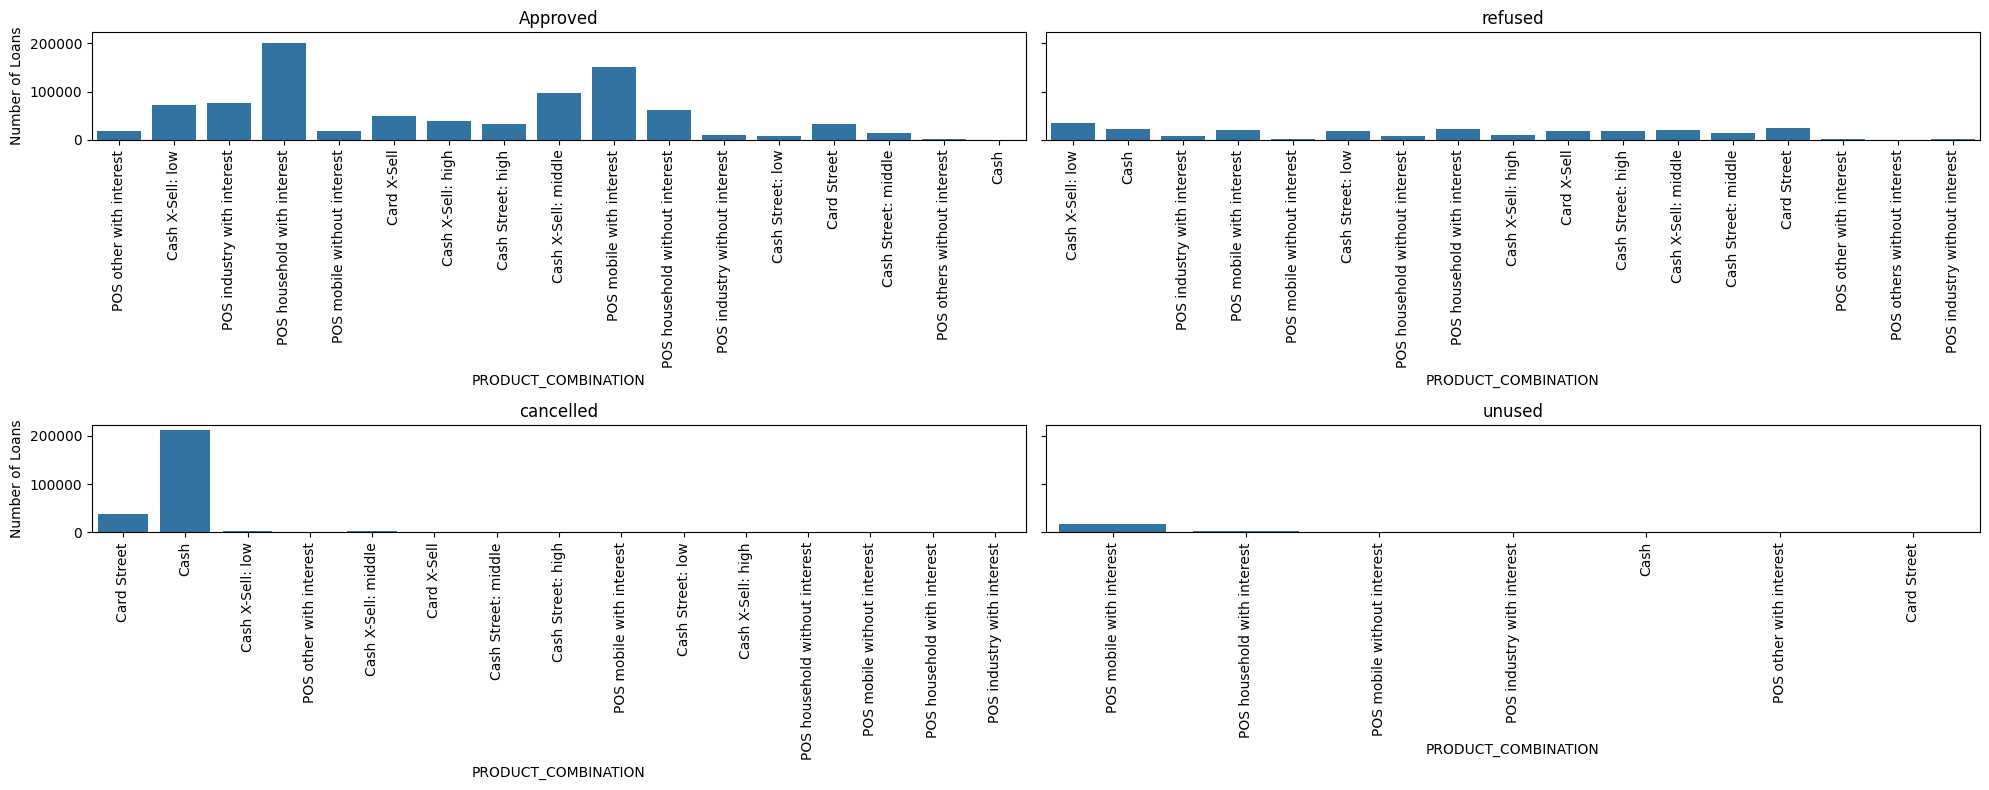

In [229]:
#Analysis on variable 'PRODUCT_COMBINATION'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,8),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='PRODUCT_COMBINATION')
ax1.set_title('Approved')
ax1.set_xlabel('PRODUCT_COMBINATION')
ax1.set_ylabel('Number of Loans')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2=sns.countplot(ax=ax2,data=refused,x='PRODUCT_COMBINATION')
ax2.set_title('refused')
ax2.set_xlabel('PRODUCT_COMBINATION')
ax2.set_ylabel('Number of Loans')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax3=sns.countplot(ax=ax3,data=cancelled,x='PRODUCT_COMBINATION')
ax3.set_title('cancelled')
ax3.set_xlabel('PRODUCT_COMBINATION')
ax3.set_ylabel('Number of Loans')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
ax4=sns.countplot(ax=ax4,data=unused_offer,x='PRODUCT_COMBINATION')
ax4.set_title('unused')
ax4.set_xlabel('PRODUCT_COMBINATION')
ax4.set_ylabel('Number of Loans')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

The most accepting loan is Cash X-sell:low And most cancelled loan is Cash and the most Unused loan is POS mobile with interest.




#BUSINESS RECOMMENDATIONS:
'Females' are more in number for applying loans.

'Working' type of applicants are having most number of unsuccessful clearances.

'Repair' based loans are having highest number of unsuccessful clearances.

Housing Type 'With Parents' having least number of unsuccessful clearances.

Banks should focus on 'Students' ,'Pensioner' for successful clearances..
